<a href="https://colab.research.google.com/github/nikcook152/NFKPools/blob/main/Analytics_and_Big_Data_20220727.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preface
The purpose of this document is to guide the reader through our data analytics project step by step. We will furthermore explain why we decided to use certain methods and formulars. 

The task of our project is to predict the amount of money that a person is likely to spend on Black Friday. Furthermore, there are other questions of interest, for example "What gender shops more on Black Friday? Do the occupations of the people have any impact on sales? Which age group is the highest spender?"<br>We will therefore follow the process of regression which is one sub category of supervised learning.

# 0. Environment Insights


Before starting with data exploration we find it interesting to analyse the environment subject to random access memory. This is in general no necessarity, but can help to understand why certain computing power intense methods might take very long time. <br>
Knowing ones environmet details can also be of use when when fine tuning the model's hyperparameter or deciding on a training set size, as these things are restricted by computing power. 

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime
Not connected to a GPU


#1. Setup

##1.1 Library Import 



For most coding projects it is common to load existing libraries and build upon existing functions. 
For the scope of our project we need the following selection of libraries: <br>
**OS:**<br>
The os library is one of the most used standard libraries. It is used to interact with operating system functionalities.
<br>
One of the use cases of this library for us is the the usage of paths of the file system.
<br><br>
**Numpy**
<br>
Numpy is the a Python library used for mathematical functions and is especially useful for machinelearning because of its ability to process large multi-dimensional arrays.
<br><br>
**Pandas**<br>
Pandas is a powerful library for data manipulation in Python.
<br>
It is used throughout our project, for exampe to easily read in the csv and manipulate it's data, for example by adding/dropping data based on columns identified by its heading. This makes the whole process of Data Analytics and especially the Pre-Processing very convenient.
<br><br>
**Matplotlib**<br>
Matplotlib is a library used for visulalization of the data, giving a better understanding.
<br><br>
**Seaborn**<br>
Seaborn is used for visualization of data and is based on mathplotlib. It's extends its functionalities and allows the creation of appealing graphics
<br><br>
**Sklearn**<br>
From the machine learning library Sklearn the preprocessing function Label Binarizer is used.
<br>
This comes into action to encode the Categorical Occupation parameter of the dataset into into a Numpy array using dummy variables.
<br><br>
**Warnings**<br>
Our use of the warnings library is simply to filter warnings that have no relevance for this project.
<br>
All warnings related to depreciated features are blocked. With "FutureWarnings" depreciation warnings for end users are blocked and with the categorization of "DepreciationWarnings" depreciation warnings addressed to developers are blocked.
<br><br>

In [ ]:
import os
import numpy as np


import pkg_resources
pkg_resources.require("pandas==1.3.5")
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

# import warnings filter
from warnings import simplefilter
# ignore warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)

##1.2 Data Import


To enable a seamless coloberation, we imported the data from a public G-file, we hereby eleminate user path and file-system dependencies. To eliminate the risk of malicious users editing our source file, we set it to read only.<br>
We load the csv-file and save the data from the in a dataframe object called *data_ori* by using the *pandas* function *read_csv*.

In [ ]:
data_ori = pd.read_csv('https://drive.google.com/u/0/uc?id=1KukM45VgI1kLQwtVdGvAuex7DT6TFf12&export=download')

##1.3 General Data exploration



This section is meant to provide us with a general understanding of the data. This is important to: <br>
•	Gain intuition about the data <br>
•	Make comparisons between distributions <br>
•	Sanity checking (data is on expected scale, in right format) <br>
•	Estimate the impact of missing data and outliers <br>
•	Summarize the data <br><br>

The first thing we do is to make sure that the file has been read correctly. To do so we inspect the first ten rows of the data_frame *data_ori* by calling it's head function and setting the row parameter to 10. 

In [ ]:
data_ori.head(10)

User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000001  P00069042      F   0-17          10             A   
1  1000001  P00248942      F   0-17          10             A   
2  1000001  P00087842      F   0-17          10             A   
3  1000001  P00085442      F   0-17          10             A   
4  1000002  P00285442      M    55+          16             C   
5  1000003  P00193542      M  26-35          15             A   
6  1000004  P00184942      M  46-50           7             B   
7  1000004  P00346142      M  46-50           7             B   
8  1000004   P0097242      M  46-50           7             B   
9  1000005  P00274942      M  26-35          20             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   
5                          3               0                   1   
6                          2               1                   1   
7                          2               1                   1   
8                          2               1                   1   
9                          1               1                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969  
5                 2.0                 NaN     15227  
6                 8.0                17.0     19215  
7                15.0                 NaN     15854  
8                16.0                 NaN     15686  
9                 NaN                 NaN      7871

Next, we will take a look at the data types.<br>
Identifying the datatypes is important for further analysis, as on the one hand some methods can only be applied to certain datatypes. On the other hand having a non expected data type for a feature can be a first indicator for error full data that should be further investigated. 

In [ ]:
print(data_ori.dtypes)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object


To prevent typos in the process of our analysis, we print a list of feature labels, which we can then copy/paste when needed at later stages of our project. 

In [ ]:
print(list(data_ori))

['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


Next, we look at the distribution of our features. This helps us to further understand the features, their ranges and the necessarity for scaling:

In [ ]:
print(data_ori.describe()) 

            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5

Additionally we will look for completness of our dataset (missing values), to see if we have to delete incomplete features or rows:

In [ ]:
print(data_ori.isnull().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


We see that there are no missing values in our dataset, besides for the features Product_category_2 and Product_category_3. 
However those two categories only hold values, if the product belongs to more than one category. 

**Attribute overview and meaning:**
<table> 
<tr>
<th>Feature name</th>
<th>Definition</th>
<th>Feature type</th>
</tr>
<tr>
<td>User_ID</td>
<td>Unique Identifier for each user</td>
<td>Int</td>
<tr>
</tr>
<tr>
<td>Product_ID</td>
<td>Unique Identifier for each product</td>
<td>Object/String</td>
<tr>
</tr>
<tr>
<td>Gender</td>
<td>Sex of User</td>
<td>Object/String</td>
<tr>
<tr>
<td>Age</td>
<td>Age of User in bins</td>
<td>Object/String</td>
<tr>
<tr>
<td>Occupation</td>
<td>Occupation of User (masked)</td>
<td>Int</td>
<tr>
<tr>
<td>City_Category</td>
<td>City of User (A,B,C)</td>
<td>Object/String</td>
<tr>
<tr>
<td>Stay_In_Current_City_Years</td>
<td>Number of years stay in current city</td>
<td>Object/String</td>
<tr>
<tr>
<td>Marital_Status</td>
<td>Marital Status of User</td>
<td>Int</td>
<tr>
<tr>
<td>Product_Category_1</td>
<td>Product Category (Masked)</td>
<td>Int</td>
<tr>
<tr>
<td>Product_Category_2</td>
<td>Additional Product Category (Masked)</td>
<td>Float</td>
<tr>
<tr>
<td>Product_Category_3</td>
<td>Additional Product Category (Masked)</td>
<td>Float</td>
<tr>
<tr>
<td>**Purchase**</td>
<td>Purchase Amount(target variable)</td>
<td>Int</td>
<tr>
</table>

#2 Feature exploration, Feature engeneering and Data frame preperation

In the following we prepare on emty data frame. 
We use .loc to so or new dataframe inherits the structure from the data_ori dataframe. This is easier, than just creating a new empty frame.<br>
We need to create four data frames, as it was not given in the task whether Occupation and City Category are ordinal.<br>

We will therefore treat those two features differently in different datasets to conclude whether these two features are ordinal or nominal: <br>


1. City nominal; Occupation nominal
2. City ordinal; Occupation nominal
3. City ordinal; Occupation ordinal
4. City nominal; Occupation ordinal




In [ ]:
data_1 = data_2 = data_3 = data_4 = data_ori.loc[:,[]] 

We will below follow the same approach for every feature in our data cleansing process, that is we will first check for the correctness of the data and then bring it into a reasonable form an algorithm can find meaning in to finally ad the feature to our target datasets.

##2.1 User ID 

The User ID is a unique identifyer for a every user. <br>
Let us use the *df.describe()* function, to get more details on it's values. 

In [ ]:
print("----------general feature information----------")
print(data_ori.User_ID.describe())
print()
print("----------Value information----------")
print(data_ori.User_ID.value_counts())

----------general feature information----------
count    5.500680e+05
mean     1.003029e+06
std      1.727592e+03
min      1.000001e+06
25%      1.001516e+06
50%      1.003077e+06
75%      1.004478e+06
max      1.006040e+06
Name: User_ID, dtype: float64

----------Value information----------
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64


We see that we have a large number of Users in our dataset. Keeping the User_Id is usually of no worth for ML as it doesn't hold any particular meaning that influences our target variable. However we need to add the User_Id to our dataframes, because we need to group by user_id before we can later perform our analysis. After performing the goup_by, we will transform the User_ids to labels and hence drop it as a feature.

In [ ]:
data_1['User_ID'] = data_2['User_ID'] = data_3['User_ID'] = data_4['User_ID'] = data_ori['User_ID']
#data_1.head(10)

##2.2 Product ID

The Product ID is a unique identifyer for a every product. <br>
Let us use the *df.describe()* function, to get more details on it's values. 

In [ ]:
print(data_ori.Product_ID.describe())

count        550068
unique         3631
top       P00265242
freq           1880
Name: Product_ID, dtype: object


We see that our previous coustomers have purchased 3,631 distinct products and 550,068 products in total. <br>
We will not put any attention on the product ID for the sake of our project for the following reasons:<br>


1.   A product ID is not an ordinal feature and would've to be encoded, creating numerious of categories, increasing the size of the data set, requiering an exponential amount of computing power.
2.   Product IDs can only be meaningfull when meaking predictions for past products, however they are not helpful to classify new prodcuts. 

A product ID itself can hence not be a valuable feature, but the product ID however carries some valuable, more granulate information of the product one can exract. In our case however we got those information provid in a nother feature called product category. Having the product categories, we belief that there is no addional value we can extract from the product ID. <br><br>
Taken the above meantioned issues and the product category feature into consideration, we came to the conclusion, that the product ID is of no further need for our project. 

##2.3 Gender

The Gender variable holds a persons gender. <br>
Let us use the *df.describe()* function, to get more details on it's values. We will herefore group our data set by user id, to not get misleading information of our user distribution based on duplicats.

----------general feature information----------
count     5891
unique       2
top          M
freq      4225
Name: Gender, dtype: object

----------Value information----------
M    4225
F    1666
Name: Gender, dtype: int64


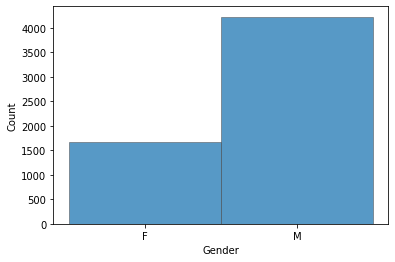

In [ ]:
print("----------general feature information----------")
print(data_ori.groupby('User_ID').first().Gender.describe())
print()
print("----------Value information----------")
print(data_ori.groupby('User_ID').first().Gender.value_counts())
sns.histplot(
    data_ori.groupby('User_ID').first().Gender,
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)

Analysing our outputs, we see that we have two possible values, that is male and female. Additionally we see a major inbalance between male and female, that is not representative for the society. This misdistribution is only of minor concern in regression. <br> 


Because gender is commonly classified as nominal, we need to one-hot encode the gender feature. This means a binary feature needs to be created for every possible value of the feature. To not run into the perfect correlation bias (Dummy variable trap), one has to delete one of the binary features afterwards. We decided to name the new feature male with 1 = male and 0 = female. <br><br>
The following code shows the one-hot encoding process and the concatinating with our four data frames. 

In [ ]:
data_1['Male'] = data_2['Male'] = data_3['Male'] = data_4['Male'] = np.where(data_ori['Gender'] == 'M', 1,0)
#print(data_1.head(10))

This line one-hot encodes the gender and performs multiple steps at one. <br>
The step-by-step logic can be seen in the graphic below. <br>
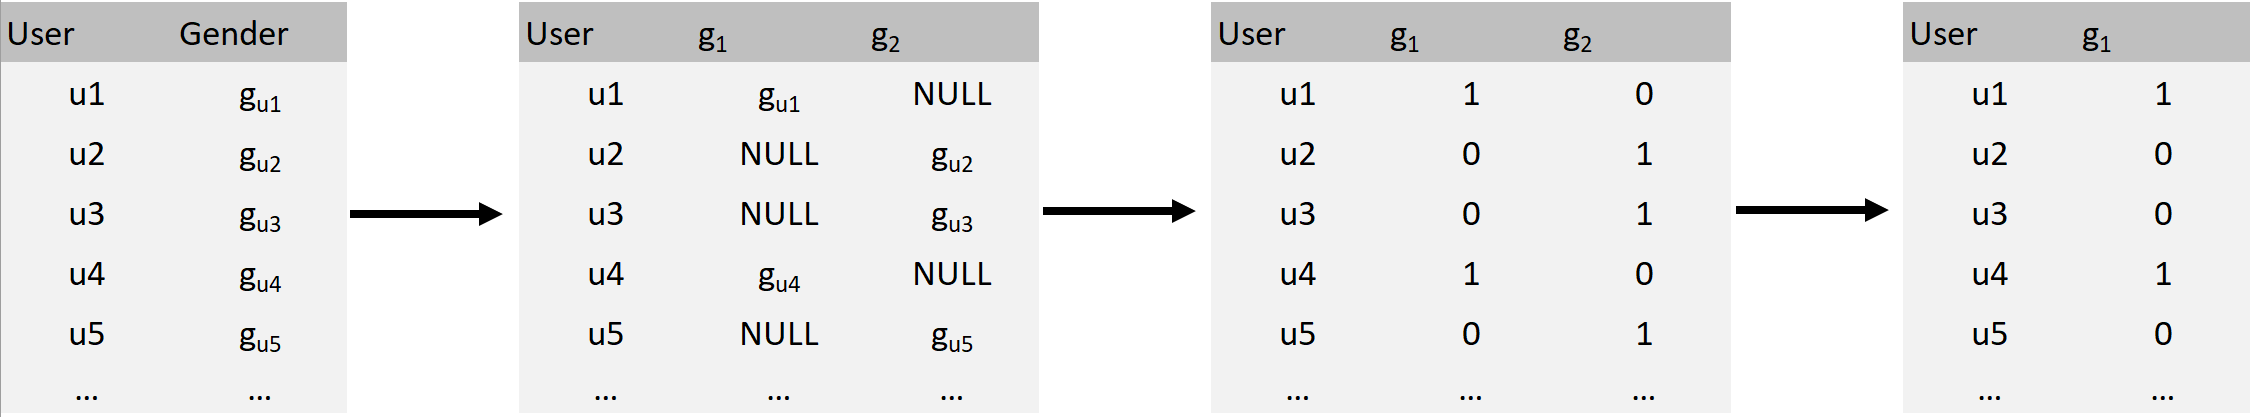


##2.4 Age

The Age variable holds a persons Age, categorized in bins. <br>
Let us use the *df.describe()* function, to get more details on it's values. We will herefore group our data set by user id, to not get misleading information of our user distribution based on duplicats.

----------general feature information----------
count      5891
unique        7
top       26-35
freq       2053
Name: Age, dtype: object

----------Value information----------
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64


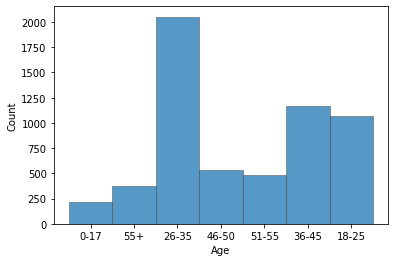

In [ ]:
print("----------general feature information----------")
print(data_ori.groupby('User_ID').first().Age.describe())
print()
print("----------Value information----------")
print(data_ori.groupby('User_ID').first().Age.value_counts())
sns.histplot(
    data_ori.groupby('User_ID').first().Age,
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)

We see that the age variable is seperated into 7 groups. Age can be a nominal or ordinal feature, dependent on the information associated with it. In our case the ages are given as interval values, we hence have to treat it as an ordinal variable, because a natural order exists. However the issue with intervals is that they can only be saved as string values and therefore are not interpretable for our machine learning algorithm. To make them usefull we need to asign labels (label encoding).<br><br>
The following code label encodes the age groups and adds them to our data frames: 


In [ ]:
data_1['Age'] = data_2['Age'] = data_3['Age'] = data_4['Age'] = data_ori['Age'].replace({'0-17':  1, 
                                                                                        '18-25': 2,
                                                                                        '26-35': 3,
                                                                                        '36-45': 4,
                                                                                        '46-50': 5,
                                                                                        '51-55': 6,
                                                                                        '55+': 7})
#print(data_1.head(10))

The graphic below describes the transformation process <br>
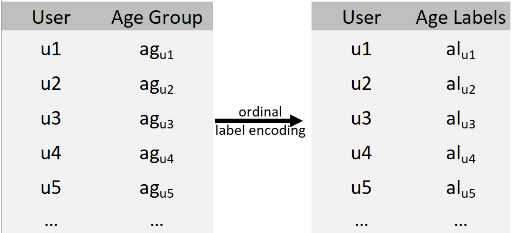

##2.5 Occupation

The Occupation variable holds a persons occupation as a categorical variable.
Let us use the *df.describe()* function, to get more details on it's values. We will herefore group our data set by user id, to not get misleading information of our user distribution based on doublicats.

----------general feature information----------
count    5891.000000
mean        8.153285
std         6.323140
min         0.000000
25%         3.000000
50%         7.000000
75%        14.000000
max        20.000000
Name: Occupation, dtype: float64

----------Value information----------
4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
15    140
13    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: Occupation, dtype: int64


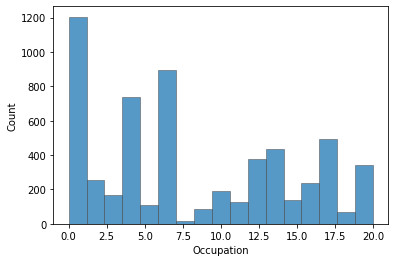

In [ ]:
print("----------general feature information----------")
print(data_ori.groupby('User_ID').first().Occupation.describe())
print()
print("----------Value information----------")
print(data_ori.groupby('User_ID').first().Occupation.value_counts())
sns.histplot(
    data_ori.groupby('User_ID').first().Occupation,
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)

We see that occupation is categorised into 20 different groups with no indication of them being ordinal or nominal. As mentioned above we will hence treat the feature as nominal in two of our datasets and as ordinal in our other two datasets. <br><br>
For the nominal part we first use the binarizer to create a dataframe with the inverted feature. To validate this step we print the number of each of the one-hot encoded columns and check them with ungrouped value counts.

In [ ]:
bi_DF = LabelBinarizer()
bi_dummys = bi_DF.fit_transform(data_ori['Occupation'])
print(bi_dummys.sum(axis=0) )
print(data_ori.Occupation.value_counts())

[69638 47426 26588 17650 72308 12177 20355 59133  1546  6291 12930 11586
 31179  7728 27309 12165 25371 40043  6622  8461 33562]
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64


After validating that the counts match, we now create a data frame for the dummy variable and name the columns accordingly.

In [ ]:
DF_dummys = pd.DataFrame(bi_dummys, columns=['Occupation_0', 'Occupation_1', 'Occupation_2', 'Occupation_3','Occupation_4','Occupation_5','Occupation_6','Occupation_7','Occupation_8','Occupation_9','Occupation_10','Occupation_11','Occupation_12','Occupation_13','Occupation_14','Occupation_15','Occupation_16','Occupation_17','Occupation_18','Occupation_19','Occupation_20',]) 

We then drop the first column to avoid the dummy variable trap. In theory it plays no role which column we drop, dropping the first column is just considered a best practice among data scientists.




In [ ]:
DF_dummys = DF_dummys.drop('Occupation_0', axis = 1)
#DF_dummys.head(10)

Because the result looks good, we can now concat the dummy variable data frame to the end of our data frames. We add them to the end to keep the sequence of the data frame upright.

In [ ]:
data_1, data_2 = pd.concat([data_1, DF_dummys], axis=1), pd.concat([data_2, DF_dummys], axis=1)
#data_1.head(10)

A visualization of the processing for the normalization of the occupation feature can be seen in the graphic below. <br>
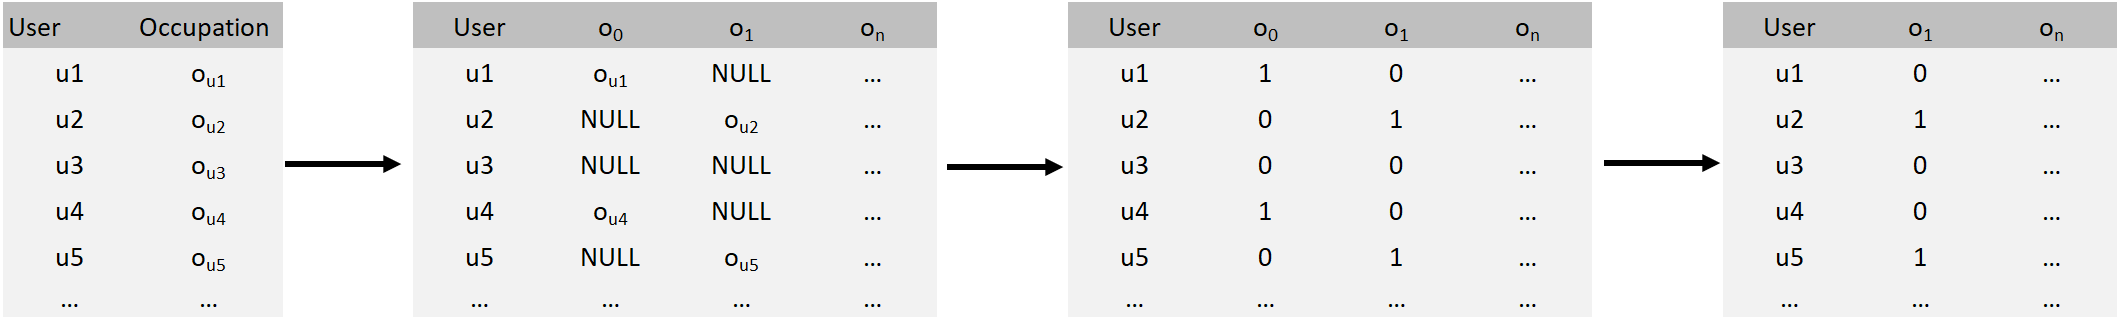

Having the nominal version of the feature added to our two data frames, we will in a last step addd the ordinal version of this feature to our remaining data sets. For this are no further steps required as the values are numerical already.

In [ ]:
data_3['Occupation'] = data_4['Occupation'] = data_ori['Occupation']
#data_3.head(10)

In [ ]:
print(data_3['Occupation'])

0         10
1         10
2         10
3         10
4         16
          ..
550063    13
550064     1
550065    15
550066     1
550067     0
Name: Occupation, Length: 550068, dtype: int64


##2.6 City Category

The City Category variable holds a persons residence as a categorical variable.
Let us use the *df.describe()* function, to get more details on it's values. We will herefore group our data set by user id, to not get misleading information of our user distribution based on duplicats.

----------general feature information----------
count     5891
unique       3
top          C
freq      3139
Name: City_Category, dtype: object

----------Value information----------
C    3139
B    1707
A    1045
Name: City_Category, dtype: int64


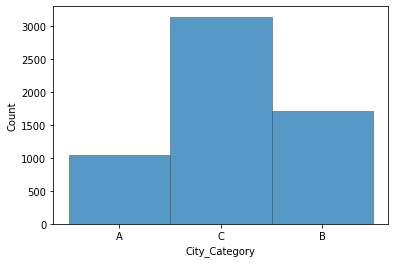

In [ ]:
print("----------general feature information----------")
print(data_ori.groupby('User_ID').first().City_Category.describe())
print()
print("----------Value information----------")
print(data_ori.groupby('User_ID').first().City_Category.value_counts())
sns.histplot(
    data_ori.groupby('User_ID').first().City_Category,
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)

The City Category is categorical and hold sthree different values (A,B,C) which indicates an oridnal nature of this feature. However we don't have any additional information to strengthen our assumption, why we decided to treat this variable as ordinal and nominal in different data sets, analog to how we did it with the occupation.<br><br>
For the nominal part we first use the binarizer to create a dataframe with the inverted feature. To validate this step we print the number of each of the one-hot encoded columns and check them with ungrouped value counts.

In [ ]:
bi_DF = LabelBinarizer()
bi_dummys = bi_DF.fit_transform(data_ori['City_Category'])
print(bi_dummys.sum(axis=0))
print(data_ori.City_Category.value_counts()) 

[147720 231173 171175]
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


After validating that the counts match, we now create a data frame for the dummy variable and name the columns accordingly.

In [ ]:
DF_dummys = pd.DataFrame(bi_dummys, columns=['City_Category_1','City_Category_2','City_Category_3']) 
#DF_dummys.head(10)

We then drop the first column to avoid the dummy variable trap. In theory it plays no role which column we drop, dropping the first column is just considered a best practice among data scientists.



In [ ]:
DF_dummys = DF_dummys.drop('City_Category_1', axis = 1)
DF_dummys.head(10)

City_Category_2  City_Category_3
0                0                0
1                0                0
2                0                0
3                0                0
4                0                1
5                0                0
6                1                0
7                1                0
8                1                0
9                0                0

Because the result looks good, we can now concat the dummy variable data frame to the end of our data frames. We add them to the end to keep the sequence of the data frame upright.

In [ ]:
data_1, data_4 = pd.concat([data_1, DF_dummys], axis=1), pd.concat([data_4, DF_dummys], axis=1)
data_1.head(10)

User_ID  Male  Age  Occupation_1  Occupation_2  Occupation_3  Occupation_4  \
0  1000001     0    1             0             0             0             0   
1  1000001     0    1             0             0             0             0   
2  1000001     0    1             0             0             0             0   
3  1000001     0    1             0             0             0             0   
4  1000002     1    7             0             0             0             0   
5  1000003     1    3             0             0             0             0   
6  1000004     1    5             0             0             0             0   
7  1000004     1    5             0             0             0             0   
8  1000004     1    5             0             0             0             0   
9  1000005     1    3             0             0             0             0   

   Occupation_5  Occupation_6  Occupation_7  ...  Occupation_13  \
0             0             0             0  ...              0   
1             0             0             0  ...              0   
2             0             0             0  ...              0   
3             0             0             0  ...              0   
4             0             0             0  ...              0   
5             0             0             0  ...              0   
6             0             0             1  ...              0   
7             0             0             1  ...              0   
8             0             0             1  ...              0   
9             0             0             0  ...              0   

   Occupation_14  Occupation_15  Occupation_16  Occupation_17  Occupation_18  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              1              0              0   
5              0              1              0              0              0   
6              0              0              0              0              0   
7              0              0              0              0              0   
8              0              0              0              0              0   
9              0              0              0              0              0   

   Occupation_19  Occupation_20  City_Category_2  City_Category_3  
0              0              0                0                0  
1              0              0                0                0  
2              0              0                0                0  
3              0              0                0                0  
4              0              0                0                1  
5              0              0                0                0  
6              0              0                1                0  
7              0              0                1                0  
8              0              0                1                0  
9              0              1                0                0  

[10 rows x 25 columns]

A visualization of the nominal transformation process of the city feature can be seen in the graphic below. <br>
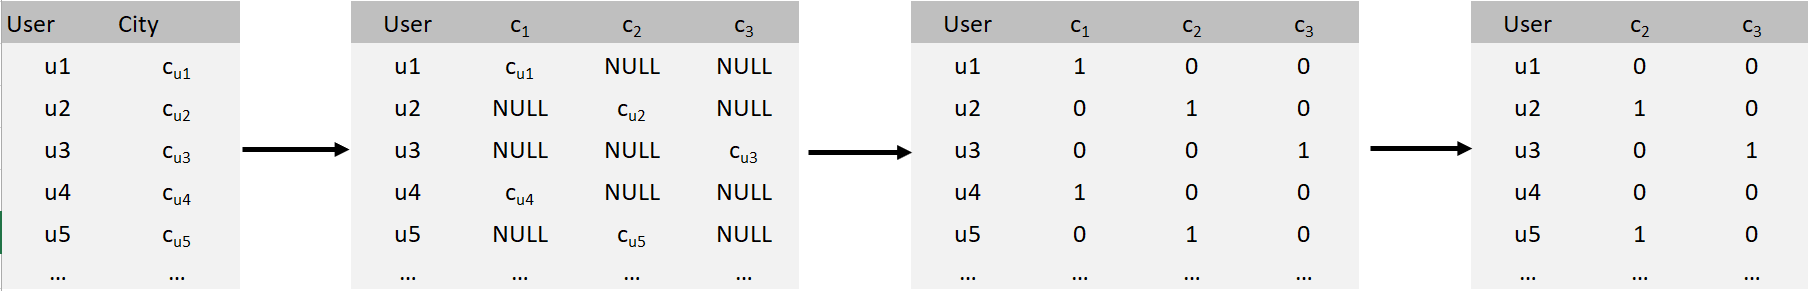

Having the nominal version of the feature added to our two data frames, we will in a last step addd the ordinal version of this feature to our remaining data sets. In order to do so, we need transform the categories into nummercial values.

In [ ]:
data_2['City_Category'] = data_3['City_Category'] = data_ori['City_Category'].replace({'A': 1, 
                                                                                      'B': 2,
                                                                                      'C': 3})

data_2.head(10)

User_ID  Male  Age  Occupation_1  Occupation_2  Occupation_3  Occupation_4  \
0  1000001     0    1             0             0             0             0   
1  1000001     0    1             0             0             0             0   
2  1000001     0    1             0             0             0             0   
3  1000001     0    1             0             0             0             0   
4  1000002     1    7             0             0             0             0   
5  1000003     1    3             0             0             0             0   
6  1000004     1    5             0             0             0             0   
7  1000004     1    5             0             0             0             0   
8  1000004     1    5             0             0             0             0   
9  1000005     1    3             0             0             0             0   

   Occupation_5  Occupation_6  Occupation_7  ...  Occupation_12  \
0             0             0             0  ...              0   
1             0             0             0  ...              0   
2             0             0             0  ...              0   
3             0             0             0  ...              0   
4             0             0             0  ...              0   
5             0             0             0  ...              0   
6             0             0             1  ...              0   
7             0             0             1  ...              0   
8             0             0             1  ...              0   
9             0             0             0  ...              0   

   Occupation_13  Occupation_14  Occupation_15  Occupation_16  Occupation_17  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              1              0   
5              0              0              1              0              0   
6              0              0              0              0              0   
7              0              0              0              0              0   
8              0              0              0              0              0   
9              0              0              0              0              0   

   Occupation_18  Occupation_19  Occupation_20  City_Category  
0              0              0              0              1  
1              0              0              0              1  
2              0              0              0              1  
3              0              0              0              1  
4              0              0              0              3  
5              0              0              0              1  
6              0              0              0              2  
7              0              0              0              2  
8              0              0              0              2  
9              0              0              1              1  

[10 rows x 24 columns]

##2.7 Stay In Current City Years

The *Stay in current city years* variable stores how long a person has lived for in the current city.
Let us use the *df.describe()* function, to get more details on it's values. We will herefore group our data set by user id, to not get misleading information of our user distribution based on duplicate.

In [ ]:
print("----------general feature information----------")
print(data_ori.groupby('User_ID').first().Stay_In_Current_City_Years.describe())
print()
print("----------Value information----------")
print(data_ori.groupby('User_ID').first().Stay_In_Current_City_Years.value_counts())

----------general feature information----------
count     5891
unique       5
top          1
freq      2086
Name: Stay_In_Current_City_Years, dtype: object

----------Value information----------
1     2086
2     1145
3      979
4+     909
0      772
Name: Stay_In_Current_City_Years, dtype: int64


We see that the variable stores the years a user has been living for in the current city. If a user has stayed in the same city for four or more years, this is denoted as "4+" and the reason this feature is stored as a string. <br> To make it readable for our machine learning model we will replace the "4+" by a numerical 4 and transform the remaining values into numerical values as well. We then add the transformed feature to our data frames as an ordinal feature. The length of a stay can be classified as ordinal, because it is naturally growing. 

In [ ]:
data_ori['Stay_In_Current_City_Years'] = data_ori['Stay_In_Current_City_Years'].replace({'4+': 4})
data_1['Stay_In_Current_City_Years'] = data_2['Stay_In_Current_City_Years'] = data_3['Stay_In_Current_City_Years'] = data_4['Stay_In_Current_City_Years'] = pd.to_numeric(data_ori['Stay_In_Current_City_Years'])      #turn strings into integer
#data_1.head(10)

##2.8 Maritial Status

The *Maritial Status* variable holds a maritial status.
Let us use the df.describe() function, to get more details on it's values. We will herefore group our data set by user id, to not get misleading information of our user distribution based on duplicats.

----------general feature information----------
count    5891.000000
mean        0.419963
std         0.493594
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Marital_Status, dtype: float64

----------Value information----------
0    3417
1    2474
Name: Marital_Status, dtype: int64


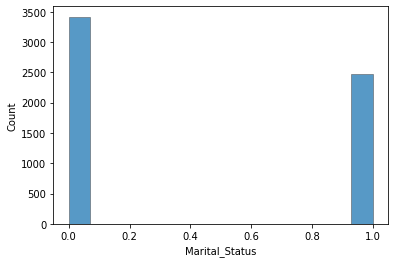

In [ ]:
print("----------general feature information----------")
print(data_ori.groupby('User_ID').first().Marital_Status.describe())
print()
print("----------Value information----------")
print(data_ori.groupby('User_ID').first().Marital_Status.value_counts())
sns.histplot(
    data_ori.groupby('User_ID').first().Marital_Status,
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)

The marital status is a pretty obvious feature, either one is married, or not.
As one is not better than the other (in theory) this variable is clearly nominal and therefore needs to be one hot encoded. However because there are only two possible values, we save the effort of one-hot encoding and just change the name of the variable to a binary variable married and add it to our data frames. 

In [ ]:
data_ori = data_ori.rename(columns={'Marital_Status': 'Married'})
data_1, data_2, data_3, data_4 = pd.concat([data_1, data_ori['Married']], axis=1), pd.concat([data_2, data_ori['Married']], axis=1), pd.concat([data_3, data_ori['Married']], axis=1), pd.concat([data_4, data_ori['Married']], axis=1)
#data_1.head(10)

##2.9 Product Category (1 to 3)

The *Product Category* variables hold up to three values in total, describing how a product is categorised. It is very important for our analysis, as past purchases behaviour can often be used to describe future purchase behaviors. We verified this asumption using a training set without the product category, that brought us a maximum R2 of about 20%, hence was only able to explain very little of the target variable. 
Let us use the df.describe() function, to get more details on it's values. <br>
We will repeat this process for all three product category variables.

In [ ]:
print("----------general feature information----------")
print(data_ori.Product_Category_1.describe())
print()
print("----------Value information----------")
print(data_ori.Product_Category_1.value_counts())

----------general feature information----------
count    550068.000000
mean          5.404270
std           3.936211
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category_1, dtype: float64

----------Value information----------
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64


In [ ]:
data_ori.Product_Category_2.fillna(value = 0, inplace = True)
print("----------general feature information----------")
print(data_ori.Product_Category_2.describe())
print()
print("----------Value information----------")
print(data_ori.Product_Category_2.value_counts())

----------general feature information----------
count    550068.000000
mean          6.735436
std           6.215492
min           0.000000
25%           0.000000
50%           5.000000
75%          14.000000
max          18.000000
Name: Product_Category_2, dtype: float64

----------Value information----------
0.0     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64


In [ ]:
data_ori.Product_Category_3.fillna(value = 0, inplace = True)
print("----------general feature information----------")
print(data_ori.Product_Category_3.describe())
print()
print("----------Value information----------")
print(data_ori.Product_Category_3.value_counts())

----------general feature information----------
count    550068.000000
mean          3.841941
std           6.250712
min           0.000000
25%           0.000000
50%           0.000000
75%           8.000000
max          18.000000
Name: Product_Category_3, dtype: float64

----------Value information----------
0.0     383247
16.0     32636
15.0     28013
14.0     18428
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: Product_Category_3, dtype: int64


We come to the conlcusion that all three features consist of the same values that is the categories 1-20. The zero values on product category 2 and product category 3 can be ignored as they're blank fills. 

### 2.9.1 One hot encoding 

The basic idea is now to merge these three columns into one one hot encoded feature. <br>
We therefore need to first one-hot encode each of the three varibles by creating dummy variables as ilustrated in the following graphic:<br>
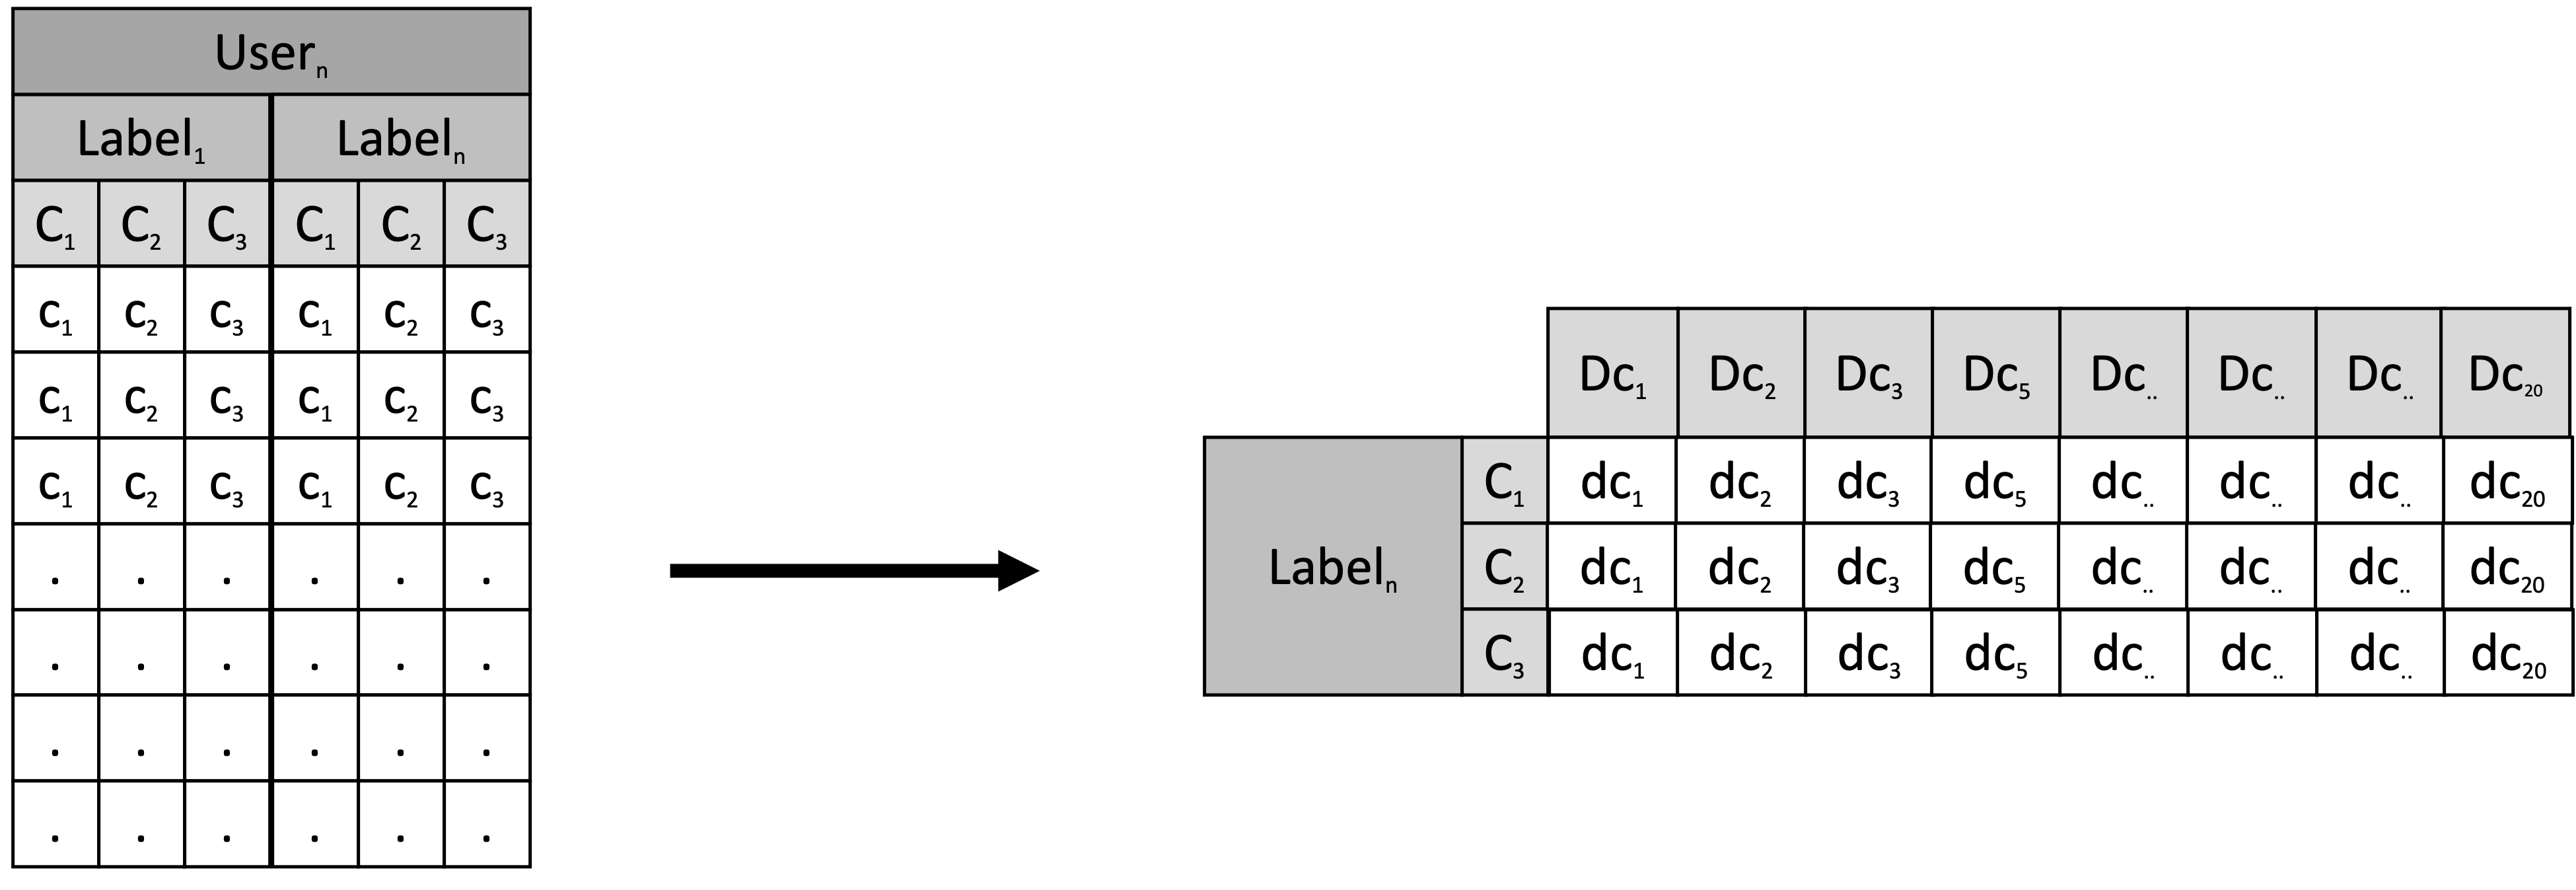

In [ ]:
bi_DF = LabelBinarizer()

In [ ]:
bi_dummys_1 = bi_DF.fit_transform(data_ori['Product_Category_1'])
bi_dummys_1.sum(axis=0) 

array([140378,  23864,  20213,  11753, 150933,  20466,   3721, 113925,
          410,   5125,  24287,   3947,   5549,   1523,   6290,   9828,
          578,   3125,   1603,   2550])

In [ ]:
bi_dummys_2 = bi_DF.fit_transform(data_ori['Product_Category_2'])
bi_dummys_2.sum(axis=0) 

array([173638,  49217,   2884,  25677,  26235,  16466,    626,  64088,
         5693,   3043,  14134,   5528,  10531,  55108,  37855,  43255,
        13320,   2770])

In [ ]:
bi_dummys_3 = bi_DF.fit_transform(data_ori['Product_Category_3'])
bi_dummys_3.sum(axis=0) 

array([383247,    613,   1875,  16658,   4890,  12562,  11579,   1726,
         1805,   9246,   5459,  18428,  28013,  32636,  16702,   4629])

After validating all counts match the expected number, we will create the associated *pd dataframes* and name the columns accordingly.

In [ ]:
DF_dummys_1 = pd.DataFrame(bi_dummys_1, columns=['Product_Cat_1','Product_Cat_2','Product_Cat_3','Product_Cat_4','Product_Cat_5','Product_Cat_6','Product_Cat_7','Product_Cat_8','Product_Cat_9','Product_Cat_10','Product_Cat_11','Product_Cat_12','Product_Cat_13','Product_Cat_14','Product_Cat_15','Product_Cat_16','Product_Cat_17','Product_Cat_18','Product_Cat_19','Product_Cat_20']) #transform into data frame; name columns 
#DF_dummys_1.head(10)

In [ ]:
DF_dummys_2 = pd.DataFrame(bi_dummys_2, columns=['Product_Cat_0','Product_Cat_2','Product_Cat_3','Product_Cat_4','Product_Cat_5','Product_Cat_6','Product_Cat_7','Product_Cat_8','Product_Cat_9','Product_Cat_10','Product_Cat_11','Product_Cat_12','Product_Cat_13','Product_Cat_14','Product_Cat_15','Product_Cat_16','Product_Cat_17','Product_Cat_18']) #transform into data frame; name columns 
#DF_dummys_2.head(10)

In [ ]:
DF_dummys_3 = pd.DataFrame(bi_dummys_3, columns=['Product_Cat_0','Product_Cat_3','Product_Cat_4','Product_Cat_5','Product_Cat_6','Product_Cat_8','Product_Cat_9','Product_Cat_10','Product_Cat_11','Product_Cat_12','Product_Cat_13','Product_Cat_14','Product_Cat_15','Product_Cat_16','Product_Cat_17','Product_Cat_18']) #transform into data frame; name columns 
#DF_dummys_3.head(10)

Next, consolidate our three dataframes to one data frame, to get a commmulative one-hot encoded variable for each tuple (identified by label).<br>
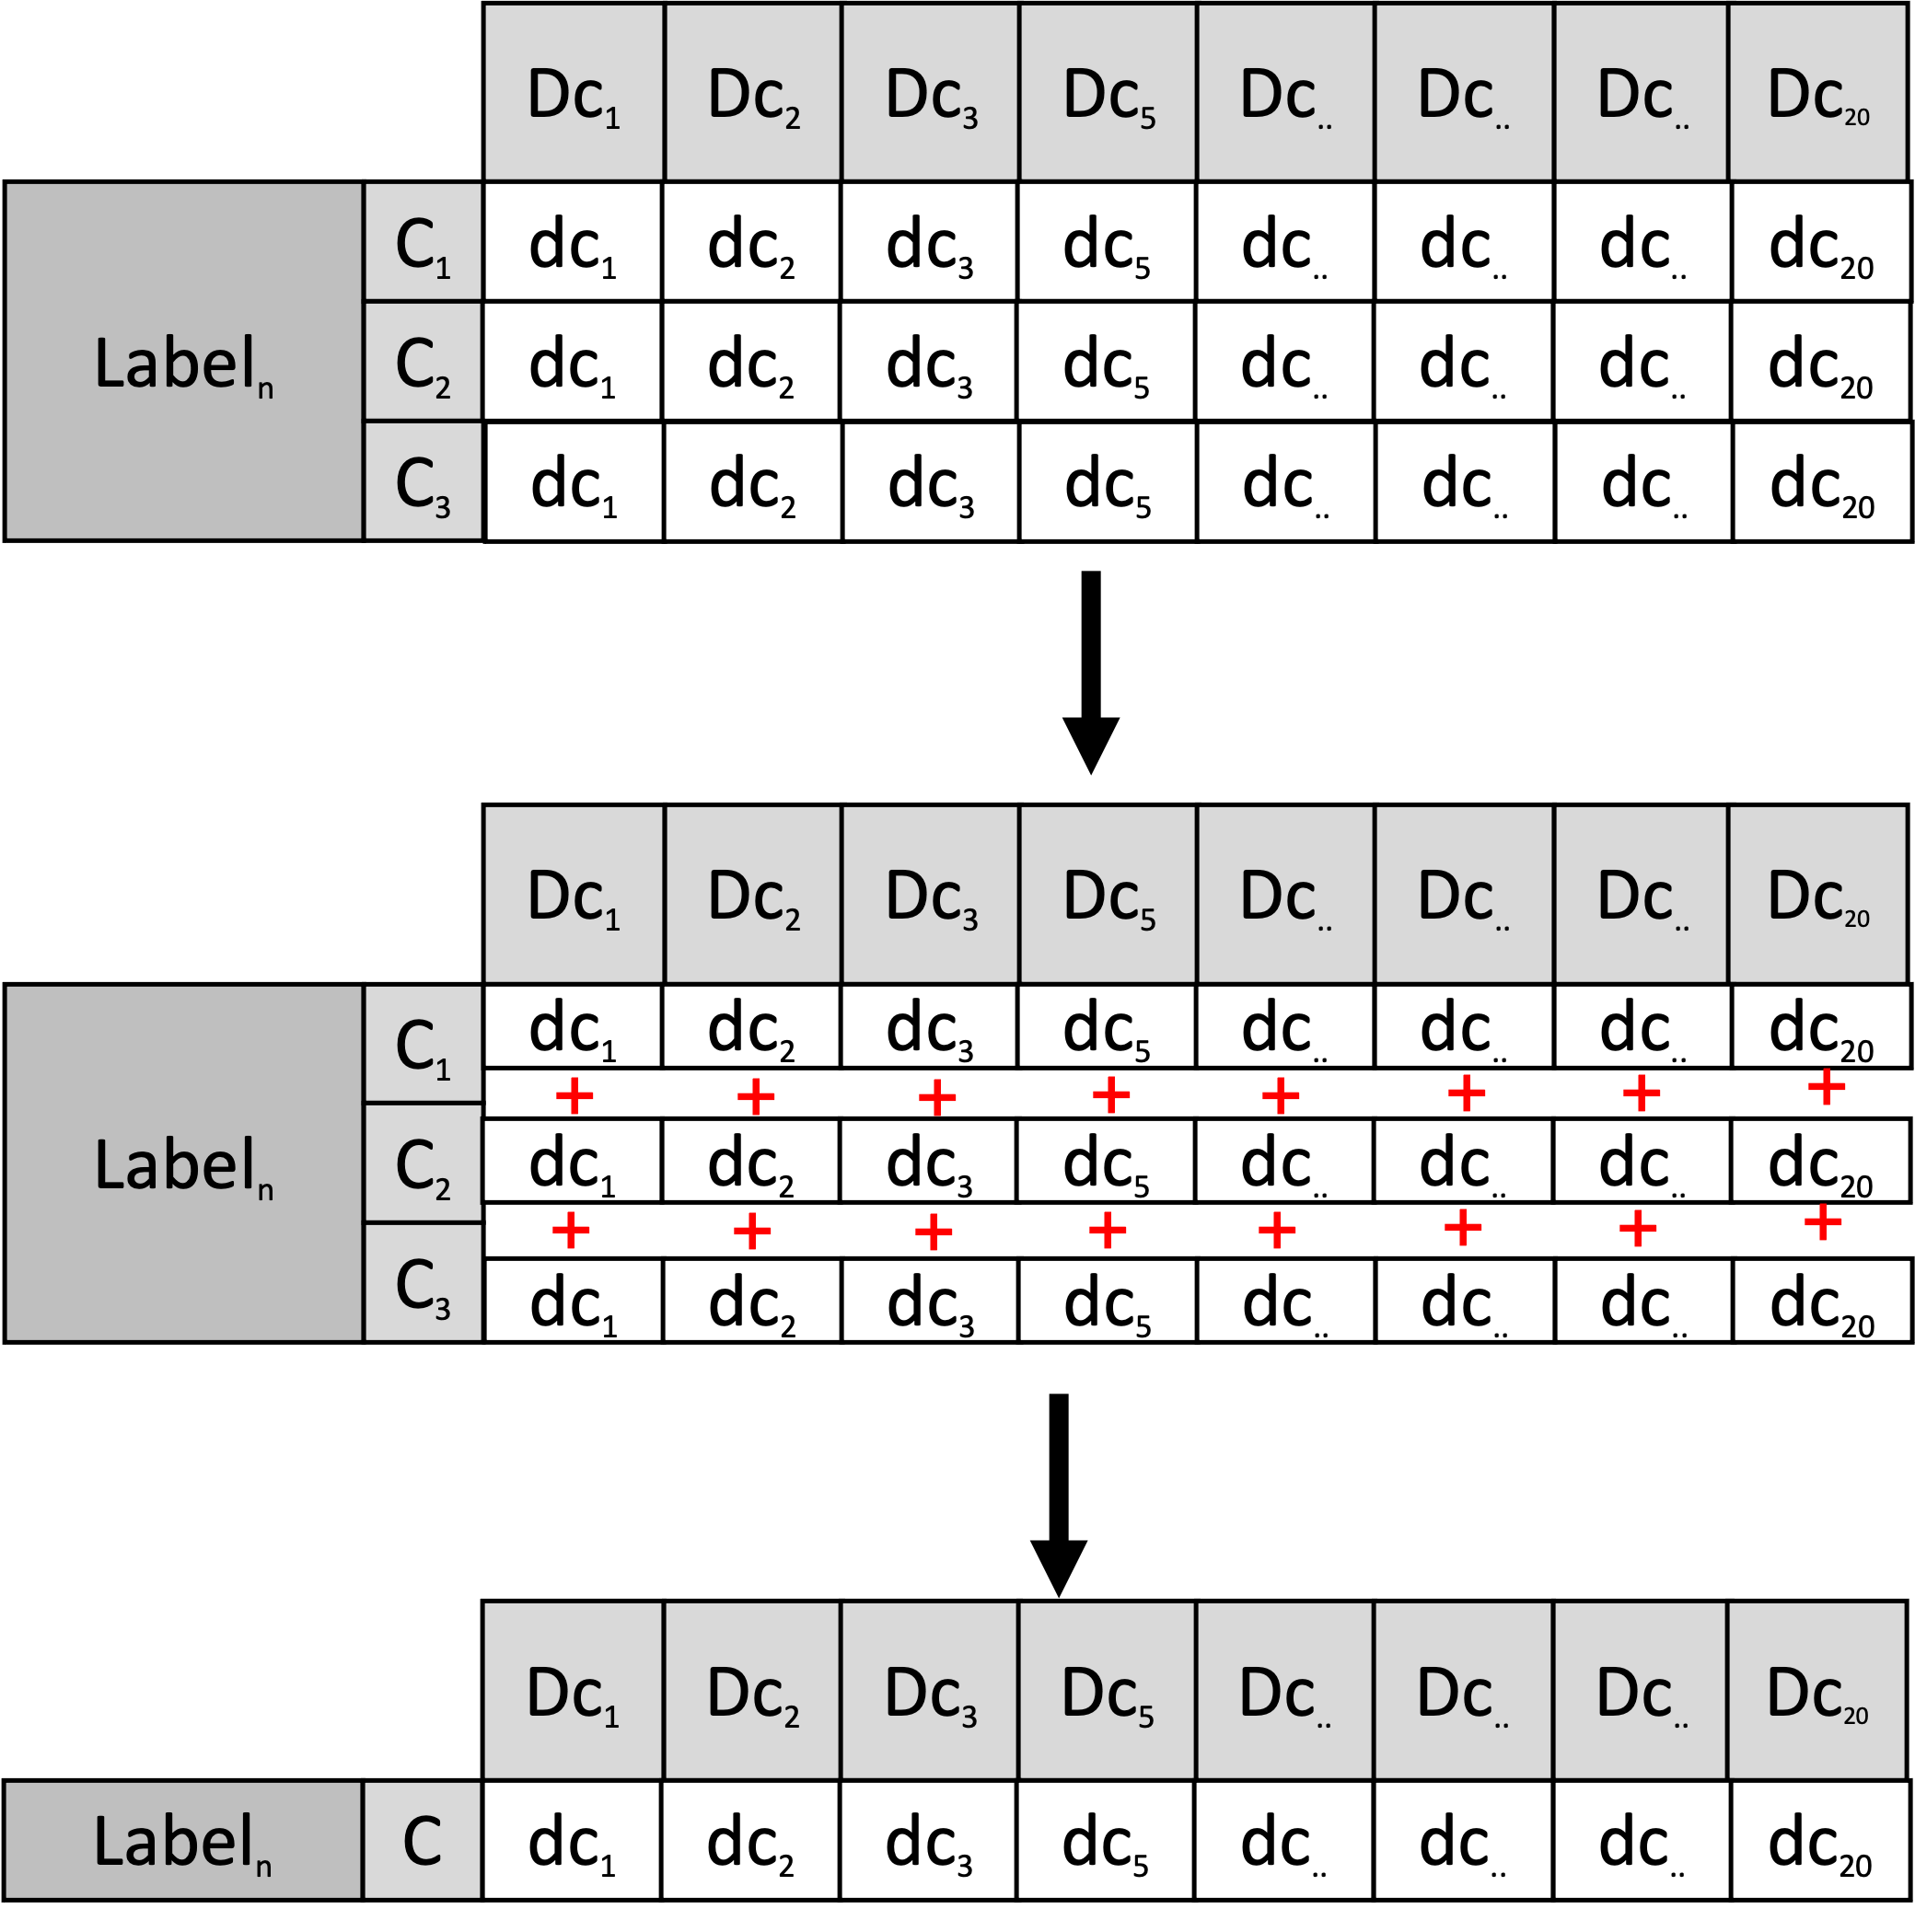

In [ ]:
df_add = DF_dummys_1.add(DF_dummys_2.add(DF_dummys_3, fill_value = 0), fill_value = 0)
#df_add.head(10)

Because our analysis is not subject to a signle purchase (tuple), but focuses on the user instead, we will in a next step sum up all purchases for a user.<br>
This is usefull for two reasons: <br>


1.   Subject orientated data 
2.   A cummulation of the data results in a smaller over all data set, making model calculations faster. (give numbers)

<br><br>
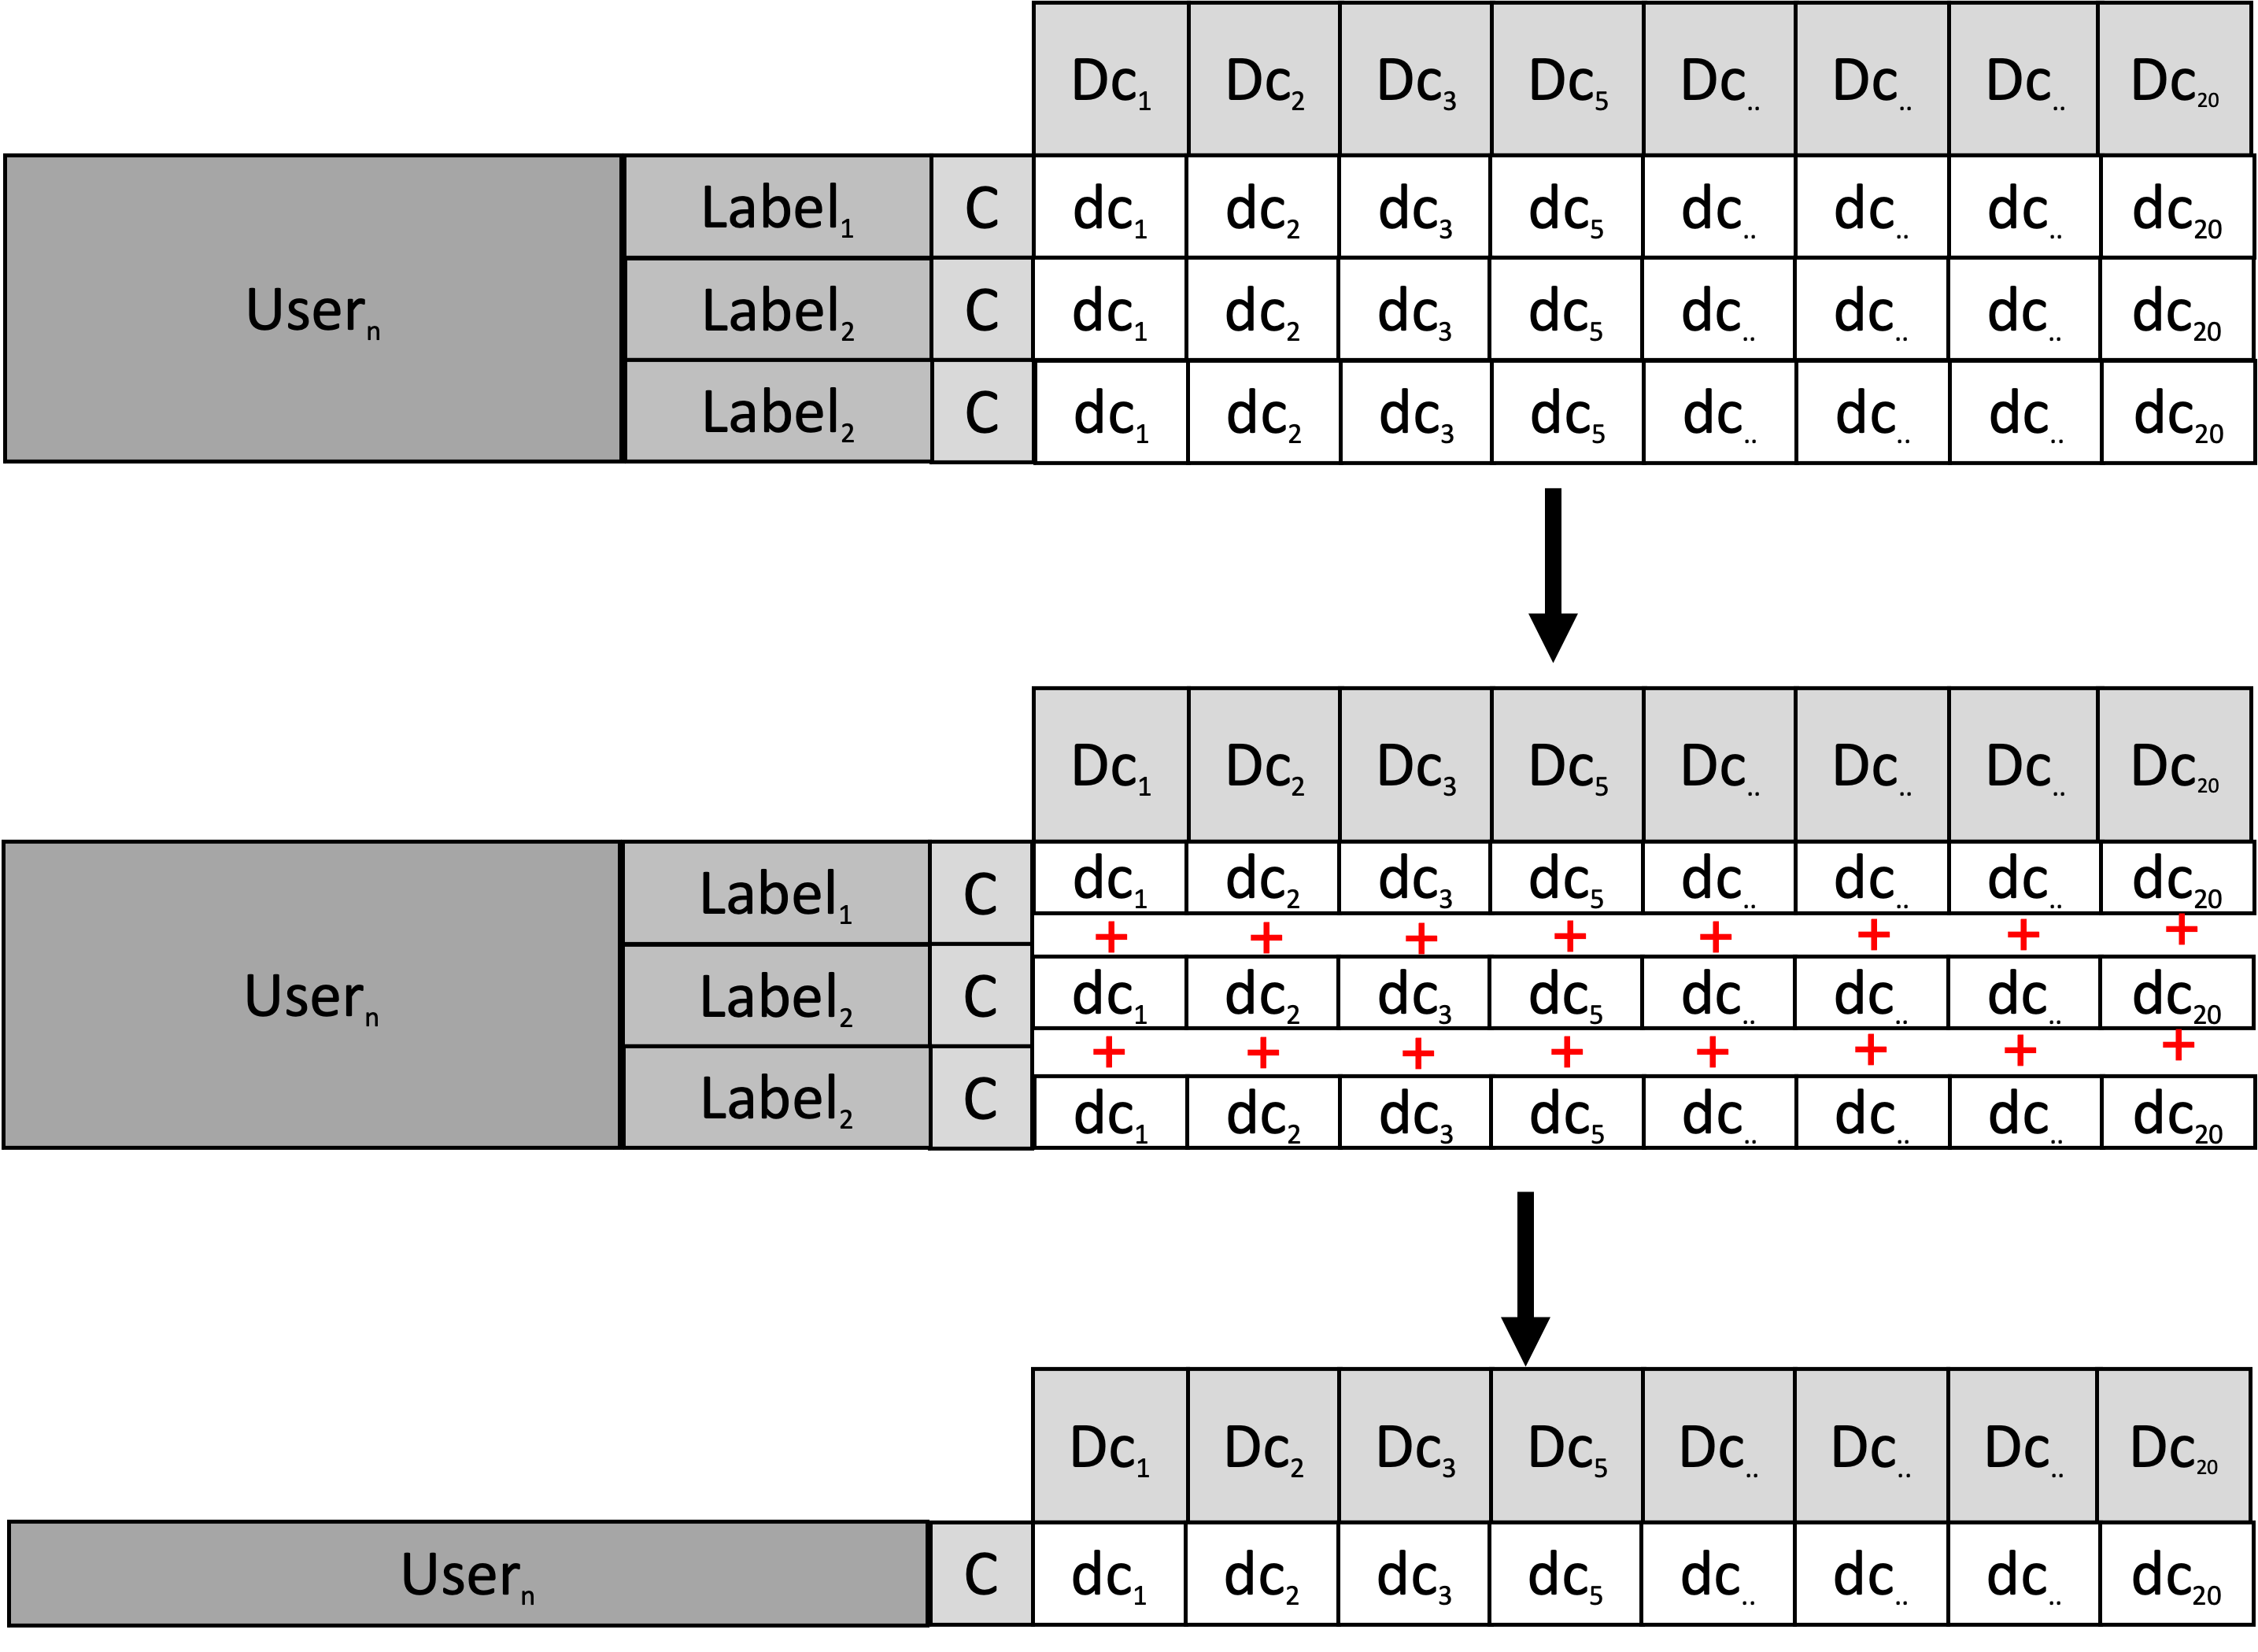



Therefore we firt add the associated User ids to our new tuples:

In [ ]:
df_add = pd.concat([data_1['User_ID'], df_add], axis=1)
#df_add.head(10)

And then do the actual group sum.<br>
As a last step we need to drop product category 0 as it was only an artificial category to handle NaNs. There's no additional need to drop one category, as there is no dummy varibale trap.

In [ ]:
df_add = df_add.groupby('User_ID').sum()
df_add = df_add.drop('Product_Cat_0', axis = 1)
#df_add.head(10)

We now also group our existing data frames by user id and compare the counts to validate that nothing has gone wrong along the way.

In [ ]:
data_1, data_2, data_3, data_4 = data_1.groupby('User_ID').first(), data_2.groupby('User_ID').first(), data_3.groupby('User_ID').first(), data_4.groupby('User_ID').first()
#data_1.head(10)
data_1.describe()
df_add.describe()


Product_Cat_1  Product_Cat_10  Product_Cat_11  Product_Cat_12  \
count    5891.000000     5891.000000     5891.000000     5891.000000   
mean       23.829231        1.679511        6.828382        3.177898   
std        29.882021        2.634334       13.037868        5.284239   
min         0.000000        0.000000        0.000000        0.000000   
25%         5.000000        0.000000        1.000000        0.000000   
50%        11.000000        1.000000        2.000000        1.000000   
75%        31.000000        2.000000        7.000000        4.000000   
max       209.000000       22.000000      161.000000       52.000000   

       Product_Cat_13  Product_Cat_14  Product_Cat_15  Product_Cat_16  \
count     5891.000000     5891.000000     5891.000000     5891.000000   
mean         3.656255       12.741300       12.248854       14.550840   
std          5.063584       16.517119       16.354618       18.635178   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        2.000000        2.000000        3.000000   
50%          2.000000        6.000000        5.000000        8.000000   
75%          5.000000       17.000000       16.000000       18.000000   
max         58.000000      209.000000      123.000000      182.000000   

       Product_Cat_17  Product_Cat_18  Product_Cat_19  Product_Cat_2  \
count     5891.000000     5891.000000     5891.000000    5891.000000   
mean         5.194364        1.786454        0.272110      12.405534   
std          6.483837        3.234874        0.445084      15.481344   
min          0.000000        0.000000        0.000000       0.000000   
25%          1.000000        0.000000        0.000000       2.000000   
50%          3.000000        1.000000        0.000000       6.000000   
75%          7.000000        2.000000        1.000000      17.000000   
max         63.000000       32.000000        1.000000     115.000000   

       Product_Cat_20  Product_Cat_3  Product_Cat_4  Product_Cat_5  \
count     5891.000000    5891.000000    5891.000000    5891.000000   
mean         0.432864       4.024784       6.672042      32.902054   
std          0.495514       6.411767      11.038906      41.388200   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       1.000000       7.000000   
50%          0.000000       2.000000       3.000000      17.000000   
75%          1.000000       5.000000       8.000000      41.000000   
max          1.000000      53.000000     110.000000     340.000000   

       Product_Cat_6  Product_Cat_7  Product_Cat_8  Product_Cat_9  
count    5891.000000    5891.000000    5891.000000    5891.000000  
mean        7.099304       0.737905      32.350195       3.001528  
std         9.054756       1.884497      40.233387       4.201766  
min         0.000000       0.000000       0.000000       0.000000  
25%         1.000000       0.000000       8.000000       0.000000  
50%         4.000000       0.000000      17.000000       1.000000  
75%         9.000000       1.000000      40.000000       4.000000  
max        78.000000      24.000000     394.000000      28.000000

After validating that the counts match, we now create a data frame for the dummy variable and name the columns accordingly.

In [ ]:
data_1, data_2, data_3, data_4 = pd.concat([data_1, df_add], axis=1), pd.concat([data_2, df_add], axis=1), pd.concat([data_3, df_add], axis=1), pd.concat([data_4, df_add], axis=1)
data_1.head(10)

Male  Age  Occupation_1  Occupation_2  Occupation_3  Occupation_4  \
User_ID                                                                      
1000001     0    1             0             0             0             0   
1000002     1    7             0             0             0             0   
1000003     1    3             0             0             0             0   
1000004     1    5             0             0             0             0   
1000005     1    3             0             0             0             0   
1000006     0    6             0             0             0             0   
1000007     1    4             1             0             0             0   
1000008     1    3             0             0             0             0   
1000009     1    3             0             0             0             0   
1000010     0    4             1             0             0             0   

         Occupation_5  Occupation_6  Occupation_7  Occupation_8  ...  \
User_ID                                                          ...   
1000001             0             0             0             0  ...   
1000002             0             0             0             0  ...   
1000003             0             0             0             0  ...   
1000004             0             0             1             0  ...   
1000005             0             0             0             0  ...   
1000006             0             0             0             0  ...   
1000007             0             0             0             0  ...   
1000008             0             0             0             0  ...   
1000009             0             0             0             0  ...   
1000010             0             0             0             0  ...   

         Product_Cat_19  Product_Cat_2  Product_Cat_20  Product_Cat_3  \
User_ID                                                                 
1000001             0.0            3.0             1.0             11   
1000002             0.0            9.0             1.0              0   
1000003             0.0           15.0             0.0              1   
1000004             0.0            4.0             1.0              0   
1000005             0.0            5.0             0.0              2   
1000006             0.0            5.0             1.0              6   
1000007             0.0            3.0             1.0              0   
1000008             1.0            6.0             0.0              2   
1000009             0.0            2.0             1.0              5   
1000010             1.0           42.0             0.0             18   

         Product_Cat_4  Product_Cat_5  Product_Cat_6  Product_Cat_7  \
User_ID                                                               
1000001             13              5              2            0.0   
1000002              0             15              9            0.0   
1000003              1             15              0            0.0   
1000004              0              0              1            0.0   
1000005              4             26              9            5.0   
1000006             12             21              1            0.0   
1000007              0              1              1            0.0   
1000008              0              9              6            0.0   
1000009              4             13             13            1.0   
1000010             37            101              6            1.0   

         Product_Cat_8  Product_Cat_9  
User_ID                                
1000001             13              2  
1000002             46              1  
1000003              6              0  
1000004              2              1  
1000005             57              0  
1000006             14              1  
1000007              3              0  
1000008             55              0  
1000009             29              1  
1000010             64             16

##2.10 Purchase (Target Variable)

Before we add our target variable to our data frames we will first have a look at it's distribution to make sure their is no unrealistic data in our dataset. We skipped this step for all of our features as they were all of categorical nature.

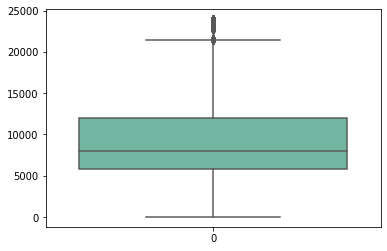

In [ ]:
sns.boxplot(data = data_ori.Purchase, orient="v", palette="Set2")

Next we will take a closer look at all values where the purchase amount is greater 20,000.

In [ ]:
data_ori.loc[data_ori.loc[:,'Purchase']>20000].head(10)

User_ID Product_ID Gender    Age  Occupation City_Category  \
213  1000036  P00288642      M  26-35           3             B   
234  1000043  P00255842      M  26-35          12             A   
324  1000053  P00109242      M  26-35           0             B   
330  1000053  P00145942      M  26-35           0             B   
343  1000058  P00117642      M  26-35           2             B   
375  1000062  P00119342      F  36-45           3             A   
465  1000084  P00163142      M  18-25           4             C   
652  1000126  P00087042      M  18-25           9             B   
731  1000139  P00020142      F  26-35          20             C   
736  1000139  P00159542      F  26-35          20             C   

    Stay_In_Current_City_Years  Married  Product_Category_1  \
213                          0        0                  16   
234                          0        0                  16   
324                          1        0                   6   
330                          1        0                   6   
343                          3        0                  10   
375                          1        0                  10   
465                          1        0                   6   
652                          1        0                  10   
731                          2        0                   7   
736                          2        0                  10   

     Product_Category_2  Product_Category_3  Purchase  
213                 0.0                 0.0     20442  
234                 0.0                 0.0     20961  
324                 8.0                10.0     20529  
330                 8.0                13.0     20474  
343                16.0                 0.0     23603  
375                13.0                 0.0     23792  
465                 8.0                 0.0     20595  
652                14.0                16.0     23233  
731                 0.0                 0.0     21002  
736                15.0                16.0     23595

After looking at the data, we perform

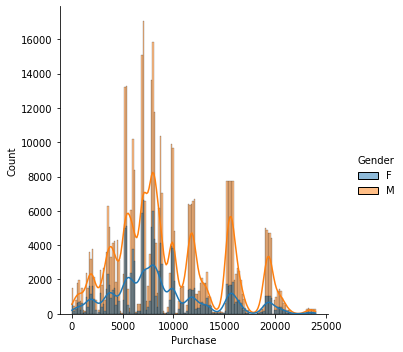

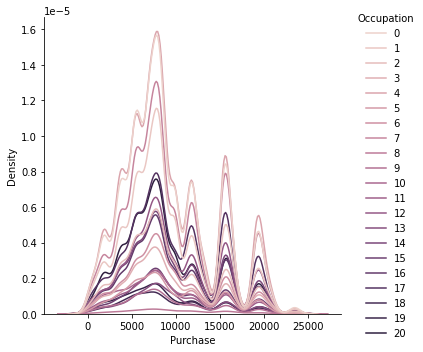

In [ ]:
sns.displot(data = data_ori, x = 'Purchase', kde = True, hue = "Gender")
sns.displot(data = data_ori, x = 'Purchase', kind = "kde", hue = "Occupation")

Both graphs undermine that .... and hence all enties should be kept.
<br><br>
Next we add the target variable to our data set. We need to make sure it is grouped by User id as well. 

In [ ]:
data_1, data_2, data_3, data_4 = pd.concat([data_1, data_ori.groupby('User_ID').sum().Purchase], axis=1), pd.concat([data_2, data_ori.groupby('User_ID').sum().Purchase], axis=1), pd.concat([data_3, data_ori.groupby('User_ID').sum().Purchase], axis=1), pd.concat([data_4, data_ori.groupby('User_ID').sum().Purchase], axis=1)
data_1.head(10)

Male  Age  Occupation_1  Occupation_2  Occupation_3  Occupation_4  \
User_ID                                                                      
1000001     0    1             0             0             0             0   
1000002     1    7             0             0             0             0   
1000003     1    3             0             0             0             0   
1000004     1    5             0             0             0             0   
1000005     1    3             0             0             0             0   
1000006     0    6             0             0             0             0   
1000007     1    4             1             0             0             0   
1000008     1    3             0             0             0             0   
1000009     1    3             0             0             0             0   
1000010     0    4             1             0             0             0   

         Occupation_5  Occupation_6  Occupation_7  Occupation_8  ...  \
User_ID                                                          ...   
1000001             0             0             0             0  ...   
1000002             0             0             0             0  ...   
1000003             0             0             0             0  ...   
1000004             0             0             1             0  ...   
1000005             0             0             0             0  ...   
1000006             0             0             0             0  ...   
1000007             0             0             0             0  ...   
1000008             0             0             0             0  ...   
1000009             0             0             0             0  ...   
1000010             0             0             0             0  ...   

         Product_Cat_2  Product_Cat_20  Product_Cat_3  Product_Cat_4  \
User_ID                                                                
1000001            3.0             1.0             11             13   
1000002            9.0             1.0              0              0   
1000003           15.0             0.0              1              1   
1000004            4.0             1.0              0              0   
1000005            5.0             0.0              2              4   
1000006            5.0             1.0              6             12   
1000007            3.0             1.0              0              0   
1000008            6.0             0.0              2              0   
1000009            2.0             1.0              5              4   
1000010           42.0             0.0             18             37   

         Product_Cat_5  Product_Cat_6  Product_Cat_7  Product_Cat_8  \
User_ID                                                               
1000001              5              2            0.0             13   
1000002             15              9            0.0             46   
1000003             15              0            0.0              6   
1000004              0              1            0.0              2   
1000005             26              9            5.0             57   
1000006             21              1            0.0             14   
1000007              1              1            0.0              3   
1000008              9              6            0.0             55   
1000009             13             13            1.0             29   
1000010            101              6            1.0             64   

         Product_Cat_9  Purchase  
User_ID                           
1000001              2    334093  
1000002              1    810472  
1000003              0    341635  
1000004              1    206468  
1000005              0    821001  
1000006              1    379930  
1000007              0    234668  
1000008              0    796593  
1000009              1    594099  
1000010             16   2169510  

[10 rows x 47 columns]

Inspecting our dataset(s), we now have our completed numerical data set(s) at hand with the user id qualifying as the tuple labels.

##2.11 Multi variable exploration

Now that all values are numerical we can take a first exploratary look at possible relationships.
<br>

In [ ]:
corr = np.corrcoef(np.random.randn(7, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#sns.heatmap(data_3.corr(), annot=True, mask=mask) Error!

Based on this colored correlation Matrix two main correlations can be seen
* **Age - Married**
<br>
This naturally makes sense as more people get married as they turn older.
* **City_Category - Purchase**
<br>
This is a very interesting correlation as it seems like that people from one city are more willing to spend more money on average than people from another city.

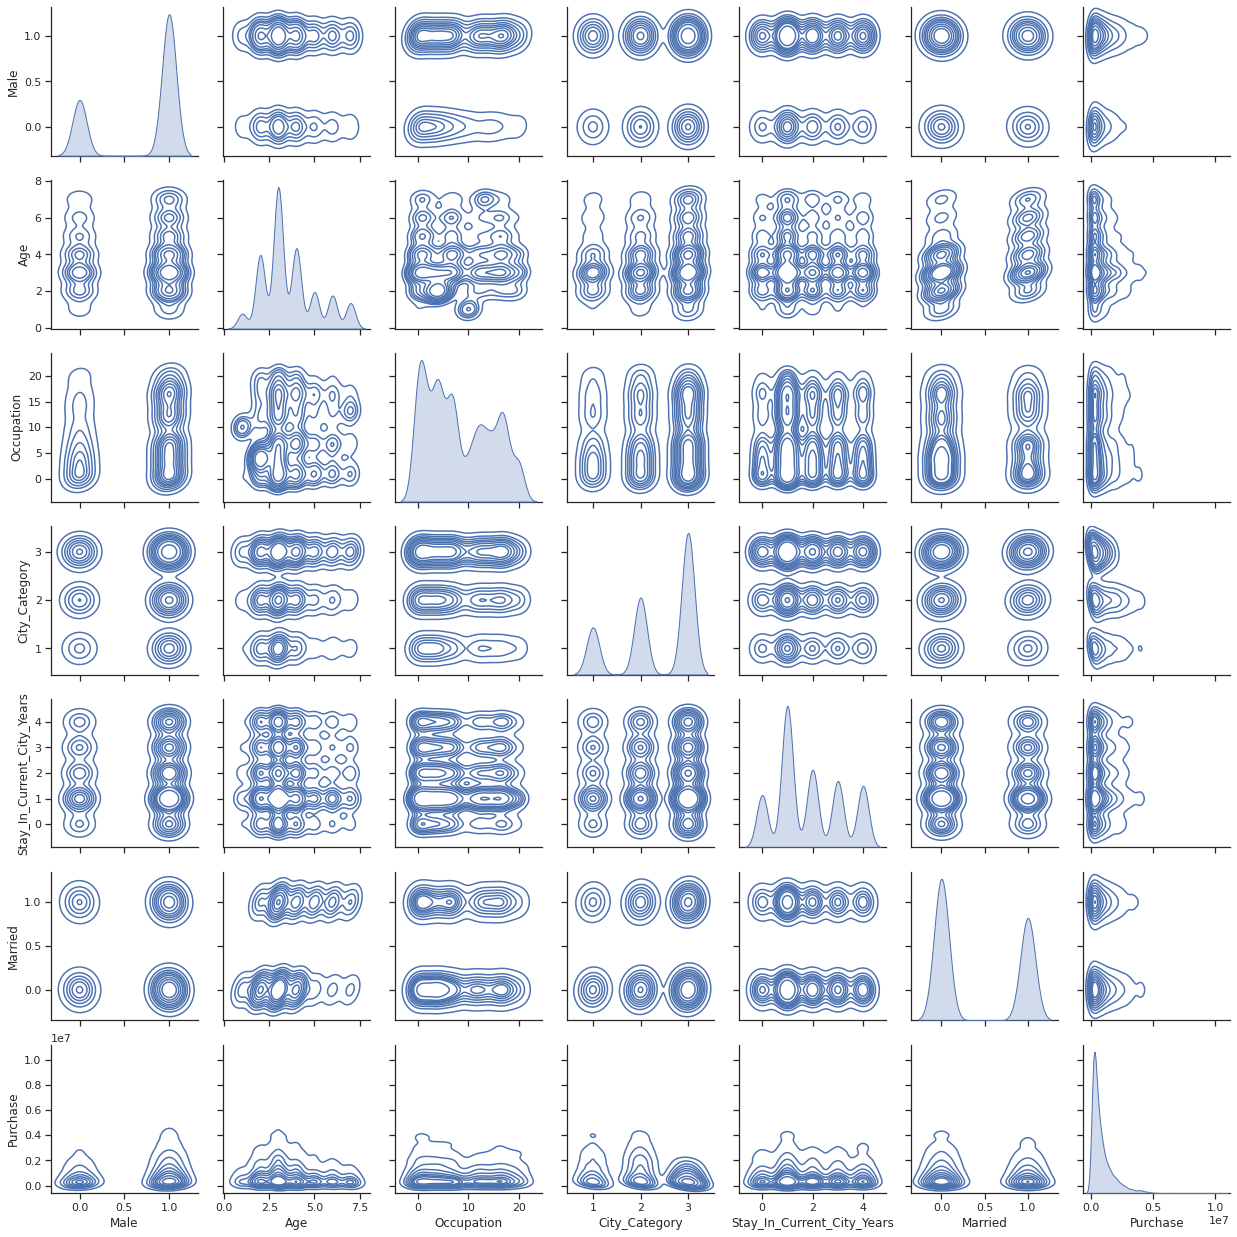

In [ ]:
mve_dataset = data_ori.loc[:,[]] 
mve_dataset = data_3.iloc[:,:6]
mve_dataset =  pd.concat([mve_dataset, data_3['Purchase']], axis=1)

sns.set(style="ticks")
sns.pairplot(mve_dataset.iloc[:,:], kind="kde")

The only row that is of realistic interest for us is the last row as we care about how the caracteristics influence the purchase behavior. <br><br>
We see that ...
* Male are more likely to spend extraordinary amounts on purchases.
* Age groups 3-5 spend the most.
* Occupation group 10 is the least willing to spend money
* City 2 has the biggest spender in it's town, while in City 3 there seems to be less "high spenders" and the spending profile of those City-3-people seems to be very consistent over the population
* New customers living in the city for 1 year now have not only a couple of people with a very high spending profile, but also seem to spend on average more than others.
*Unmarried people with a high spending profile on Black Friday spend more than married people with a high spending profile

## 2.12 Problem of the Dataset

Now that we have a good overview of ur dataset, we can also identify some critical critical factors. The biggest uncertainty for our analysis is a missing purchase date. We know from our analysis, that a customer can have multiple purchases, but we have no idication whether all purchases in the dataset are from the same day. Lacking this information, we will not be able to understand time series patters and are forced to assume that all purchases were made at the same time. This can lead to errors in the cross validation at a later stage.

#3 Split the dataframes

In this step we split the our datasets again into features and target value. One can ask why we've just combined them one step before. This was to simplify the visual analysis and because it is best practice.

In [ ]:
data_1_x, data_2_x, data_3_x, data_4_x = data_1.drop('Purchase', axis = 1), data_2.drop('Purchase', axis = 1), data_3.drop('Purchase', axis = 1), data_4.drop('Purchase', axis = 1)

In [ ]:
data_1_y = data_2_y = data_3_y = data_4_y = data_1['Purchase']

#4 Scaling (normilazation)

Scaling is used to bring the values of the features in a better shape for the different algorithms. Scaling brings the values, which are often very differing in their ranges and magnitude, on the same level. This allows faster processing and often a higher accuracy as features will not automatically weight more just because of their initial scale.
Common approaches for scaling are normalization and standardization. While standardization is a rather statistical approach with values ranging from -1 to 1 and a mean of 0, normalization is mostly used in machine learning. In normalization output values range from 0 to 1. For our project we therefore decide to normalize our datasets.
<br><br>
Important to note is that the scaling has to be reversed in the end (or the scaler has to be saved)to use the model with new data and derive valuable findings.

In [ ]:
from sklearn import preprocessing
nscaler = preprocessing.MinMaxScaler()
data_1_x.iloc[:,:], data_2_x.iloc[:,:], data_3_x.iloc[:,:], data_4_x.iloc[:,:] = nscaler.fit_transform(data_1_x.iloc[:,:]), nscaler.fit_transform(data_2_x.iloc[:,:]), nscaler.fit_transform(data_3_x.iloc[:,:]), nscaler.fit_transform(data_4_x.iloc[:,:])

data_1_x.describe()

Male          Age  Occupation_1  Occupation_2  Occupation_3  \
count  5891.000000  5891.000000   5891.000000   5891.000000   5891.000000   
mean      0.717196     0.436740      0.087761      0.043456      0.028858   
std       0.450400     0.249932      0.282971      0.203899      0.167420   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       0.000000     0.333333      0.000000      0.000000      0.000000   
50%       1.000000     0.333333      0.000000      0.000000      0.000000   
75%       1.000000     0.500000      0.000000      0.000000      0.000000   
max       1.000000     1.000000      1.000000      1.000000      1.000000   

       Occupation_4  Occupation_5  Occupation_6  Occupation_7  Occupation_8  \
count   5891.000000   5891.000000   5891.000000   5891.000000   5891.000000   
mean       0.125615      0.018842      0.038703      0.113563      0.002886   
std        0.331443      0.135979      0.192903      0.317307      0.053646   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...  Product_Cat_19  Product_Cat_2  Product_Cat_20  Product_Cat_3  \
count  ...     5891.000000    5891.000000     5891.000000    5891.000000   
mean   ...        0.272110       0.107874        0.432864       0.075939   
std    ...        0.445084       0.134620        0.495514       0.120977   
min    ...        0.000000       0.000000        0.000000       0.000000   
25%    ...        0.000000       0.017391        0.000000       0.000000   
50%    ...        0.000000       0.052174        0.000000       0.037736   
75%    ...        1.000000       0.147826        1.000000       0.094340   
max    ...        1.000000       1.000000        1.000000       1.000000   

       Product_Cat_4  Product_Cat_5  Product_Cat_6  Product_Cat_7  \
count    5891.000000    5891.000000    5891.000000    5891.000000   
mean        0.060655       0.096771       0.091017       0.030746   
std         0.100354       0.121730       0.116087       0.078521   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.009091       0.020588       0.012821       0.000000   
50%         0.027273       0.050000       0.051282       0.000000   
75%         0.072727       0.120588       0.115385       0.041667   
max         1.000000       1.000000       1.000000       1.000000   

       Product_Cat_8  Product_Cat_9  
count    5891.000000    5891.000000  
mean        0.082107       0.107197  
std         0.102115       0.150063  
min         0.000000       0.000000  
25%         0.020305       0.000000  
50%         0.043147       0.035714  
75%         0.101523       0.142857  
max         1.000000       1.000000  

[8 rows x 46 columns]

We inspect the result to make sure everything looks good.

#5 Partitioning 

Next we partion our data into training and test samples. We decided to use a random split for the distributin and a slide bar to visualize the sample size choice.<br>
For our analysize we decided on a training size of 80%. A training set of 80% is a common size as it provides enough data to train the model suffiencly, but still prevents overfitting.

In [ ]:
from sklearn.model_selection import train_test_split

training_set_percentage = 0.8 #@param {type:"slider", min:0, max:1, step:0.01}
X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(data_1_x, data_1_y, test_size = 1 - training_set_percentage, random_state=0)
X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(data_2_x, data_2_y, test_size = 1 - training_set_percentage, random_state=0)
X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(data_3_x, data_3_y, test_size = 1 - training_set_percentage, random_state=0)
X_4_train, X_4_test, Y_4_train, Y_4_test = train_test_split(data_4_x, data_4_y, test_size = 1 - training_set_percentage, random_state=0)


Y_1_train_mean,Y_2_train_mean,Y_3_train_mean,Y_4_train_mean = Y_1_test.mean(),Y_2_test.mean(),Y_3_test.mean(),Y_4_test.mean()
Y_1_train_meandev,Y_2_train_meandev,Y_3_train_meandev,Y_4_train_meandev = sum((Y_1_train-Y_1_train_mean)**2),sum((Y_2_train-Y_2_train_mean)**2),sum((Y_3_train-Y_3_train_mean)**2),sum((Y_4_train-Y_4_train_mean)**2)
Y_1_test_meandev, Y_2_test_meandev, Y_3_test_meandev, Y_4_test_meandev = sum((Y_1_test-Y_1_train_mean)**2), sum((Y_2_test-Y_2_train_mean)**2), sum((Y_3_test-Y_3_train_mean)**2), sum((Y_4_test-Y_4_train_mean)**2)

Next we create a report dataframe to later compare the results of different models and of our different data sets.

In [ ]:
report = pd.DataFrame(columns=['Model','R2.Train','R2.Test','R2_Mean_CV','R2_Std_CV', 'data_set'])

We then store our data sets in an array so that we can later easily itterate through them.

In [ ]:
datasets = [[X_1_train, Y_1_train, X_1_test, Y_1_test,Y_1_train_meandev,Y_1_test_meandev, '1'],[X_2_train, Y_2_train, X_2_test, Y_2_test,Y_2_train_meandev,Y_2_test_meandev, '2'],[X_3_train, Y_3_train, X_3_test, Y_3_test,Y_3_train_meandev,Y_3_test_meandev, '3'],[X_4_train, Y_4_train, X_4_test, Y_4_test,Y_4_train_meandev,Y_4_test_meandev, '4']]


#6 Models (pre tesing)

Now, that all preperation is completed, we can come to the model pre testing part.<br>
We use this section of the project to test which data set is the right one and which models are worth fine tuning in a second step. In addition we wil use this part to briefly explain the concept as well as advantages and disadvantages of each model. Please note, that we will always use cross validation and grid search for the following two reasons to not make assumptions on wrong results: 


1.   Prevent endogenization of the test data, that is the test data is used to modify the model and is therefore not independent anymore.
2.   Prevent a selection bias. Random states and test sample sizes must be changed. 

Cross validation solves both problems. <br>
The idea behind cross validation is to loop the process multiple times with different random states. If there’s a big difference in the accuracy after resampling, one should not use the model. An indicator for quality is mean & standard deviation and F1. 

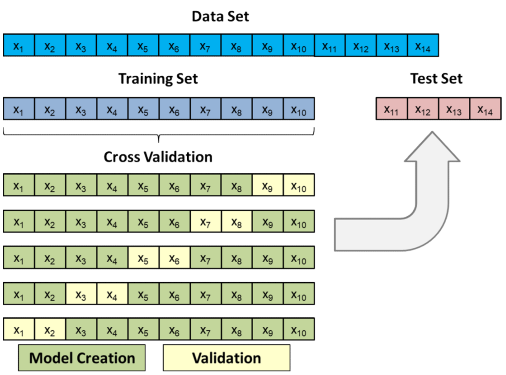


##6.1 OLS

The OLS regression is part of the glassbox regression family (Regression models classify as glass box models, when they're easily understandable and interpretable) and assumes a linear relationship between x and y. 
OLS can therefore be seen as a one-layer network, linear function with two tasks: 

1.   Measure the influence of the feature on the target 
2.   Scale the data (ß does)

OLS can be used for stability reasons and is able to perform with a growing number of inputs. 
The problem with regression is, that it gives some variables higher weight than others. 
<br>
An OLS is not suitable for high dimensional data that is when we have more features then observations.
<br>
However an OLS analysis is a good, easy and not competing intensively method to start ones analysis as it exspecially outlines the linearity level of the dataset. 
<br>
In the following we will perform the OLS for our 4 datasets one after another and compare its results.
<br>
A parameter that we try out during the process is the "fit_intercept". If set to "False" the y-intercept will stay at 0, while it is variable if set to "True"
<br>
The used "cv" parameter is set to 10, creating 10 splits for the cross-validation
<br>
<br>
In order to examine the performance of each Ridge Regression model, the R2 and Pseudo R2 are calculated

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

for X_train, Y_train, X_test, Y_test, Y_train_meandev, Y_test_meandev, data_set in datasets:
  print("-------- Data Set ", data_set, "--------")
  lmCV = LinearRegression()
  param_grid = { 
      'fit_intercept':[True,False]
  }
  CV_olsmodel = GridSearchCV(estimator=lmCV, param_grid=param_grid, cv=10)
  CV_olsmodel.fit(X_train, Y_train)
  print(CV_olsmodel.best_params_)
  lmCV = lmCV.set_params(**CV_olsmodel.best_params_)
  lmCV.fit(X_train, Y_train)
  Y_train_pred = lmCV.predict(X_train)
  Y_train_dev = sum((Y_train-Y_train_pred)**2)
  r2 = 1 - Y_train_dev/Y_train_meandev
  print("R2 =", r2)
  Y_test_pred = lmCV.predict(X_test)
  Y_test_dev = sum((Y_test-Y_test_pred)**2)
  pseudor2 = 1 - Y_test_dev/Y_test_meandev
  print("Pseudo-R2 =", pseudor2)
  report.loc[len(report)] = ['OLS RegressionCV', r2, pseudor2,
            CV_olsmodel.cv_results_['mean_test_score'][CV_olsmodel.best_index_],
            CV_olsmodel.cv_results_['std_test_score'][CV_olsmodel.best_index_], data_set]

-------- Data Set  1 --------
{'fit_intercept': False}
R2 = 0.9751693626339754
Pseudo-R2 = 0.9733147199272963
-------- Data Set  2 --------
{'fit_intercept': False}
R2 = 0.9751660749904355
Pseudo-R2 = 0.973297233751839
-------- Data Set  3 --------
{'fit_intercept': False}
R2 = 0.9750616834312533
Pseudo-R2 = 0.9732464769056477
-------- Data Set  4 --------
{'fit_intercept': False}
R2 = 0.9750645211473056
Pseudo-R2 = 0.9732650475159943


Inspecting the result of the OLS analysis, we see that the resulst of all four datasets are very promising with an OLS regression.
<br>
All datasets create a fit with an R2 between of about 0.97
<br> 
Based on the great result with the standardparameters of OLS, further finetuning will be made on an OLS model for solving this task. Furthermore, this strongly indicates that we are in a very linear world.

##6.2 Ridge Regression

The Ridge Regression adds an additional term to the OLS regression, called the sum of squared betas. The sum of squared betas, can be interpreted as a penalty for widely distributed betas. We can use the hyper parameter lambda (aplha in sklearn) to weight the penalty and to put pressure on the beta parameters to be smaller/closer together.<br>
Compley models are usually in danger of overfitting. By increasing lambda we can decrease complexity and hence reduce the risk of overfitting. The graphic shows the relationship between lambda and complexity 

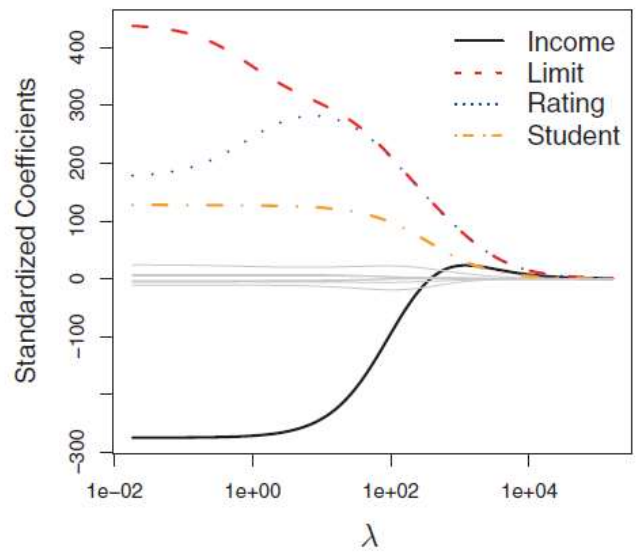



In the following we will execute the Ridge Regression for all four of our datasets.
<br> 
During the process we will test the effect of different alpha values on the model. With this we can find the optimal pressure on the betas to create the best result for with Ridge regression
<br>
The "cv" Parameter is again used for the cross validation
<br>
<br>
In order to examine the performance of each Ridge Regression model, the R2 and Pseudo R2 are calculated

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


for X_train, Y_train, X_test, Y_test, Y_train_meandev, Y_test_meandev, data_set in datasets:
  print("-------- Data Set ", data_set, "--------")
  # find best lambda (alphas)
  ridgeregCV = Ridge()
  param_grid = { 
      'alpha': [50,45,40,35,30,25,20,15,10,4,3,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01,0]
  }
  CV_rrmodel = GridSearchCV(estimator=ridgeregCV, param_grid=param_grid, cv=10)
  CV_rrmodel.fit(X_train, Y_train)
  print(CV_rrmodel.best_params_)
  ridgeregCV = ridgeregCV.set_params(**CV_rrmodel.best_params_)
  ridgeregCV.fit(X_train, Y_train)
  Y_train_pred = ridgeregCV.predict(X_train)
  Y_train_dev = sum((Y_train-Y_train_pred)**2)
  r2 = 1 - Y_train_dev/Y_train_meandev
  print("R2 =", r2)
  Y_test_pred = ridgeregCV.predict(X_test)
  Y_test_dev = sum((Y_test-Y_test_pred)**2)
  pseudor2 = 1 - Y_test_dev/Y_test_meandev
  print("Pseudo-R2 =", pseudor2)
  report.loc[len(report)] = ['Ridge RegressionCV', r2, pseudor2,
            CV_rrmodel.cv_results_['mean_test_score'][CV_rrmodel.best_index_],
            CV_rrmodel.cv_results_['std_test_score'][CV_rrmodel.best_index_], data_set]
 

-------- Data Set  1 --------
{'alpha': 0.2}
R2 = 0.9751651970591527
Pseudo-R2 = 0.9732200875999313
-------- Data Set  2 --------
{'alpha': 0.2}
R2 = 0.975160610253042
Pseudo-R2 = 0.9731965014314972
-------- Data Set  3 --------
{'alpha': 0.2}
R2 = 0.9750548316969708
Pseudo-R2 = 0.973139568500896
-------- Data Set  4 --------
{'alpha': 0.2}
R2 = 0.9750585667841407
Pseudo-R2 = 0.973164010333558


Inspecting the result of the OLS analysis, we see that the Ridge Regression is performing similar like the standard OLS.
The extended method of Ridge Regression produces very good results, but does not add any value compared to the "base" version of OLS. This finding makes sense as the major task of the "Ridge Regression" is to bring the betas closer together and prevent influence from very big values. However, since we have scaled our data before and our data is vrey linear, there is no futher measurable effect/advantage using the "Ridge Regression".
Investigating further the OLS is therefore more desirable than the Ridge Regression. 



##6.3 Support Vector Regression

Support vector regressions add another term to the ridge regression and therefore to the OLS which is the ability to not only handly complexibility, but also noise. <br>
Support vector regressions are very robost models, that find their robostness in the elimination of noise (through the incentive loss function) and the handling of complexity (lambda, analog to the ridge regression).<br>
There is a region surrounding the regression line called the epsilon region where data objects are ignored.<br><br>
Support Vector Regression also offers a solution for non-linear datasets. The idea is to transform the world to a linear world, instead of creating a non-linear model. To do so, one must add additional dimension to the data, to find a linear classifier. <br>
The transformation function that is applied to the data is called a kernel function and is very powerful. There are two famous kernel functions:


1.   Polynomial kernel --> adds additional dimension 
2.   Radial basis function --> transform every data point using the gaussian curve (narrowness is dependent on gamma) 


<br>

In the following we will itterate through our four datasets and perform a grid search for each.

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

for X_train, Y_train, X_test, Y_test, Y_train_meandev, Y_test_meandev, data_set in datasets:
  print("-------- Data Set ", data_set, "--------")
  RbfSVRregCV = SVR()
  param_grid = { 
      'kernel': ["linear"],                                                          
      'C': [5000000],                                                                   
      'epsilon': [0.0],                                                           
      'gamma' : [ 1., 2.]                                                           
  }
  CV_svrmodel = GridSearchCV(estimator=RbfSVRregCV, param_grid=param_grid, cv=10)
  CV_svrmodel.fit(X_train, Y_train)
  print(CV_svrmodel.best_params_)
  RbfSVRregCV = RbfSVRregCV.set_params(**CV_svrmodel.best_params_)
  RbfSVRregCV.fit(X_train, Y_train)
  Y_train_pred = RbfSVRregCV.predict(X_train)

  #print(Y_train_pred)

  Y_train_dev = sum((Y_train-Y_train_pred)**2)
  r2 = 1 - Y_train_dev/Y_train_meandev
  print("R2 =", r2)
  Y_test_pred = RbfSVRregCV.predict(X_test)
  Y_test_dev = sum((Y_test-Y_test_pred)**2)
  pseudor2 = 1 - Y_test_dev/Y_test_meandev
  print("Pseudo-R2 =", pseudor2)
  report.loc[len(report)] = ['Support Vector RegressionCV', r2, pseudor2,
            CV_svrmodel.cv_results_['mean_test_score'][CV_svrmodel.best_index_],
            CV_svrmodel.cv_results_['std_test_score'][CV_svrmodel.best_index_], data_set]  

-------- Data Set  1 --------
{'C': 5000000, 'epsilon': 0.0, 'gamma': 1.0, 'kernel': 'linear'}
R2 = 0.9747001702956214
Pseudo-R2 = 0.9727363540081051
-------- Data Set  2 --------
{'C': 5000000, 'epsilon': 0.0, 'gamma': 1.0, 'kernel': 'linear'}
R2 = 0.9747072719197714
Pseudo-R2 = 0.972733739129297
-------- Data Set  3 --------
{'C': 5000000, 'epsilon': 0.0, 'gamma': 1.0, 'kernel': 'linear'}
R2 = 0.9746394533149307
Pseudo-R2 = 0.9727147941317543
-------- Data Set  4 --------
{'C': 5000000, 'epsilon': 0.0, 'gamma': 1.0, 'kernel': 'linear'}
R2 = 0.9746579912662544
Pseudo-R2 = 0.972789461080201


Inspecting the result of the SVR analysis, we see very promissing results for all four models. Each one of them is very closely to the others with an R2 of about 0.977.
<br>
Also the Pseudo-R2 is in about the same range, proving a nice model with high accuracy without overfitting. However, the the C had to be set very high, resulting in a high need of computing power and an inefficiency compared to the standard OLS.

##6.4 Neural Networks

A neural network consists of neurons. Some neurons serve input of values (input neurons) others serve output and can be subject to a function (output neurons). A function can be simply summing up all the input values. 
The neurons are interconnected, which makes it a network. Those network connecters can also have properties in terms of different weights that then for example apply to the numbers. 
The weights can be interpreted as the betas from OLS. 
This one layer/OLS approach is also called SLP (single layer perceptron)
<br>
In a more complex approach, so called hidden layers are added as additional layers between the input and output layer to generate non-linearity and therefore represent the real world. This is called MLP (multi-layer perceptron). 
<br>
There are different hyper parameters we can set to influence the complexity and fit of our model. We should again not aim for a perfect fit, to not get an overfit.
<br>
The weights are adjusted via backwards propagation, meaning that random weights are chosen in the first round and an error is calculated. Those weights are then adjusted in the next round subject to the gradient decent, starting with those of the output layer in attempt to minimize the error. To reduce training time, there are some methods (auto encode) that start with smart initial weights, to reduce the number of necessary iterations. 
<br>
The gradient is the slope of a function. A local minimum exists where the gradient equals zero. 
The gradient (of steepest) decent is an approach to getting closer to the minimum by iteratively optimizing the weights, so one cannot shoot over the optimal minimum. We can define an alpha, to limit our step size to avoid osculation (jumping over the minimum).


<br>

In the following we will itterate through our four datasets and perform a grid search for each.



In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

for X_train, Y_train, X_test, Y_test, Y_train_meandev, Y_test_meandev, data_set in datasets:
  print("-------- Data Set ", data_set, "--------")
  NNetRregCV = MLPRegressor(solver='lbfgs', random_state=0)
  param_grid = { 
      'hidden_layer_sizes': [(5,), (8,), (10,), (13,)],
      'alpha': [0.0, 0.0025, 0.005, 0.0075, 0.01, 0.1],
      'activation': ["logistic", "tanh"],
      'max_iter': [1000000000000000000000000000000000000]
  }
  CV_nnmodel = GridSearchCV(estimator=NNetRregCV, param_grid=param_grid, cv=10)
  CV_nnmodel.fit(X_train, Y_train)
  print(CV_nnmodel.best_params_)
  NNetRregCV = NNetRregCV.set_params(**CV_nnmodel.best_params_)
  NNetRregCV.fit(X_train, Y_train)
  Y_train_pred = NNetRregCV.predict(X_train)
  Y_train_dev = sum((Y_train-Y_train_pred)**2)
  r2 = 1 - Y_train_dev/Y_train_meandev
  print("R2 =", r2)
  Y_test_pred = NNetRregCV.predict(X_test)
  Y_test_dev = sum((Y_test-Y_test_pred)**2)
  pseudor2 = 1 - Y_test_dev/Y_test_meandev
  print("Pseudo-R2 =", pseudor2)
  report.loc[len(report)] = ['Neural NetworkCV', r2, pseudor2,
            CV_nnmodel.cv_results_['mean_test_score'][CV_nnmodel.best_index_],
            CV_nnmodel.cv_results_['std_test_score'][CV_nnmodel.best_index_], data_set]

-------- Data Set  1 --------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'activation': 'logistic', 'alpha': 0.0025, 'hidden_layer_sizes': (5,), 'max_iter': 1000000000000000000000000000000000000}
R2 = 0.4629666914144345
Pseudo-R2 = 0.4799498767077315
-------- Data Set  2 --------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'activation': 'logistic', 'alpha': 0.005, 'hidden_layer_sizes': (5,), 'max_iter': 1000000000000000000000000000000000000}
R2 = 0.5186335072811888
Pseudo-R2 = 0.45726958321072797
-------- Data Set  3 --------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (13,), 'max_iter': 1000000000000000000000000000000000000}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


R2 = 0.0009674201735093702
Pseudo-R2 = -0.00030263369835159537
-------- Data Set  4 --------
{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (13,), 'max_iter': 1000000000000000000000000000000000000}
R2 = 0.0007210114360185482
Pseudo-R2 = -0.0006968566665386255


Inspecting the result of the Neural Networks we can see, that none of the models create a good fit, even after a high number of iterations. This shows, that NN needs and extremly long time to find valuable information in the dataset and that its for this reason simply not the right method. <br>
We stopped the process after 1,000,000,000,000,000,000,000,000,000,000,000,000 itterations because NN had proven already to be the wrong method.<br>
Based on the devestating performance, no further tuning of NN will be made.

## 6.5 Decision Tree

Decision Trees have some advantages over random forests, as the can for example be used to better understand the data and get meaningful insights in feature importance and to breakdown complex datasets into smaller, manageable subsets. <br>
We will however not use a decisin tree model in our paper, but EBM which combines the advantages of decision trees with the advantages of the random forest and is hence a more efficient way to go.


##6.6 Random Forest

A random forest is a combination of multiple trees to a forest and belongs to the black box model family. A random forest can consist of some high satisfied trees and some weaker trees. To get the full advantage of random forest, the mostly only consist of weaker satisifed trees. This principle can be compared to population with some experts that have deep knowledge and others that have basic knowledge and is commonly referred to as wisdom of the crowd. <br>
In Regression the result can than be calculated from the average of the trees (Bagging), or aggregated by a supervisory model (stagging??).
<br> 

Adv: 
-	Higher accuracy than decision trees 
-	Less bias probability than decision trees 
-	Can be parilized 
-	Not too calculation intense (less satisfied trees can be used)
-	Missing values don’t matter 
-	No need to scale 

Disadv: 
-	Can’t be visualized 
-	Interpretation ability gets lost 

<br>
In the following we will itterate through our four datasets and perform a grid search for each.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

for X_train, Y_train, X_test, Y_test, Y_train_meandev, Y_test_meandev, data_set in datasets:
  print("-------- Data Set ", data_set, "--------")
  RForregCV = RandomForestRegressor(random_state=0)
  param_grid = { 
      'max_depth': [ 4.,  5.,  6.,  7.,  8.],
      'n_estimators': [ 10,  50,  100, 150, 200]
  }
  CV_rfmodel = GridSearchCV(estimator=RForregCV, param_grid=param_grid, cv=10)
  CV_rfmodel.fit(X_train, Y_train)
  print(CV_rfmodel.best_params_)
  RForregCV = RForregCV.set_params(**CV_rfmodel.best_params_)
  RForregCV.fit(X_train, Y_train)
  Y_train_pred = RForregCV.predict(X_train)
  Y_train_dev = sum((Y_train-Y_train_pred)**2)
  r2 = 1 - Y_train_dev/Y_train_meandev
  print("R2 =", r2)
  Y_test_pred = RForregCV.predict(X_test)
  Y_test_dev = sum((Y_test-Y_test_pred)**2)
  pseudor2 = 1 - Y_test_dev/Y_test_meandev
  print("Pseudo-R2 =", pseudor2)
  report.loc[len(report)] = ['Random ForestCV', r2, pseudor2,
            CV_rfmodel.cv_results_['mean_test_score'][CV_rfmodel.best_index_],
            CV_rfmodel.cv_results_['std_test_score'][CV_rfmodel.best_index_], data_set]

-------- Data Set  1 --------
{'max_depth': 8.0, 'n_estimators': 200}
R2 = 0.9882409784339083
Pseudo-R2 = 0.9658030680624923
-------- Data Set  2 --------
{'max_depth': 8.0, 'n_estimators': 200}
R2 = 0.9882388020785512
Pseudo-R2 = 0.9661275170807909
-------- Data Set  3 --------
{'max_depth': 8.0, 'n_estimators': 200}
R2 = 0.9882203226373835
Pseudo-R2 = 0.9658905148454503
-------- Data Set  4 --------
{'max_depth': 8.0, 'n_estimators': 100}
R2 = 0.98793721553029
Pseudo-R2 = 0.966240935654263


Inspecting the result of the Random Forest method, an exeptionally fit for all modells can be seen with an R2 of over 0.99, showing, that the model is able to comprehend all the trainingdata. <br>
The performance on testdata is also very good with 0.959 across the board.
A further investigation and tuning of the Random Forest will be made.

##6.7 Explainable Boosting Regressor

Explainable boosting machines (parent category of EBR) combine the accuracy advantage of random forests with the interpretability advantage of decision trees.<br>
Having an interpretable model is important because it helps to fine tune the model, answer business related questions and in our case is even necessary to answer the questions of this exercise.<br>
Gradient boost is an ensemble learning algorithm that is  a tree-based, cyclic gradient boosting Generalized Additive Model.<br>
The algorithm starts by building a leaf to predict the target value, that is in our regression the average value of our training set. Next, it builds a tree upon the errors, the leaf made. Building a second model on top of the errors a first model produces is called boosting. The next tree is always meant to predict the residual of the privous prediction and the actual value. The algorithm hence tries to identify the features, that account for the residual. Each addtional tree is weighted and makes the reduces the residual, until no further reduction is possble, or the set limit is reached (hyper parameter). EBM builds trees of the same scale/importance (unlike adaBoost) <br>
The size of those threes (hyper parameter) are restricted, but larger than the stumps in adaBoost, a different boosting method.<br>
The following graphic shows an overview of different machine learning algorithms in terms of accuracy and interpretability.


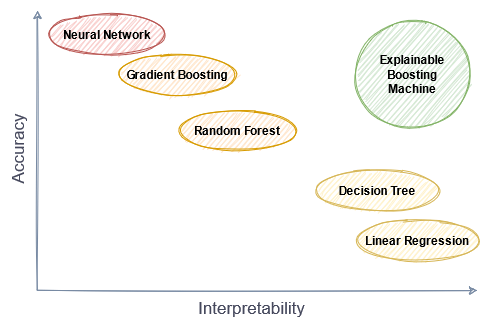
<br>
First, we need to install a new library for this model called *"interpret"*.

In [ ]:
!pip install interpret 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.6 MB 7.9 MB/s 
     |████████████████████████████████| 756 kB 49.1 MB/s 
     |████████████████████████████████| 569 kB 55.4 MB/s 
     |████████████████████████████████| 275 kB 60.4 MB/s 
     |████████████████████████████████| 9.8 MB 68.5 MB/s 
     |████████████████████████████████| 5.8 MB 53.5 MB/s 
     |████████████████████████████████| 3.6 MB 49.7 MB/s 
     |████████████████████████████████| 281 kB 78.3 MB/s 
     |████████████████████████████████| 132 kB 76.9 MB/s 
     |████████████████████████████████| 793 kB 67.5 MB/s 
     |████████████████████████████████| 251 kB 64.4 MB/s 
     |████████████████████████████████| 132 kB 63.1 MB/s 
     |████████████████████████████████| 423 kB 61.6 MB/s 
     |████████████████████████████████| 381 kB 62.9 MB/s 
     |████████████████████████████████| 76 kB 8.3 MB/s 
     |████████████████████████████

The *interpret* library holds the "ExplainableBoostingRegressor" class that will be used to initialize the model. In the fine tuning section we will also import use the show function, that makes the properties of the model viseble/interpreteble and helps to make the EBM as easy to interpret as decision trees. Because there is no cross validation class available for EBM, we will cross validate manually in the fine tuning part of this paper.

In [ ]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

In [ ]:
for X_train, Y_train, X_test, Y_test, Y_train_meandev, Y_test_meandev, data_set in datasets:
  ebm = ExplainableBoostingRegressor()
  ebm.fit(X_train, Y_train)
  Y_train_pred = ebm.predict(X_train)
  Y_train_dev = sum((Y_train-Y_train_pred)**2)
  r2 = 1 - Y_train_dev/Y_train_meandev
  print("R2 =", r2)
  Y_test_pred = ebm.predict(X_test)
  Y_test_dev = sum((Y_test-Y_test_pred)**2)
  pseudor2 = 1 - Y_test_dev/Y_test_meandev
  print("Pseudo-R2 =", pseudor2)
  report.loc[len(report)] = ['EBM Regressor', r2, pseudor2,
            'N/A',
            'N/A', data_set]

R2 = 0.9814189447097597
Pseudo-R2 = 0.966935141889939
R2 = 0.98146499626824
Pseudo-R2 = 0.966924377111379
R2 = 0.9814099424103889
Pseudo-R2 = 0.9669239588237283
R2 = 0.9813876229637307
Pseudo-R2 = 0.9669000883752874


##6.8 KNN

K-NN has no assumption of linearity, no function. It’s called stream learning, very fast and there’s no need to recalculate the model. It’s a very simple, but powerful approach. <br>
The main assumption underlying KNN is that objects that are close to each other are likely to be simular. A rich white person would for example never move to a black neighbourhood.
<br>
The procedure is that one first has to define a number (k) of neighbours that are then used to classify (in classification) and to determine the value in regression of a new data object.<br>
This determination can be done by taking the avarage value of the k-nearest neighbours, or via hard/soft voting in classifiction.

<br>

In the following we will itterate through our four datasets and perform a grid search for each.


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

for X_train, Y_train, X_test, Y_test, Y_train_meandev, Y_test_meandev, data_set in datasets:
  print("-------- Data Set ", data_set, "--------")
  knnmodelCV = KNeighborsRegressor()
  param_grid = { 
      'n_neighbors': range(3, 22, 2),
  }
  CV_knnmodel = GridSearchCV(estimator=knnmodelCV, param_grid=param_grid, cv=10)
  CV_knnmodel.fit(X_train, Y_train)
  print(CV_knnmodel.best_params_)
  knnmodelCV = knnmodelCV.set_params(**CV_knnmodel.best_params_)
  knnmodelCV.fit(X_train, Y_train)
  Y_train_pred = knnmodelCV.predict(X_train)
  Y_train_dev = sum((Y_train-Y_train_pred)**2)
  r2 = 1 - Y_train_dev/Y_train_meandev
  print("R2 =", r2)
  Y_test_pred = knnmodelCV.predict(X_test)
  Y_test_dev = sum((Y_test-Y_test_pred)**2)
  pseudor2 = 1 - Y_test_dev/Y_test_meandev
  print("Pseudo-R2 =", pseudor2)
  report.loc[len(report)] = ['k-Nearest NeighborsCV', r2, pseudor2,
            CV_knnmodel.cv_results_['mean_test_score'][CV_knnmodel.best_index_],
            CV_knnmodel.cv_results_['std_test_score'][CV_knnmodel.best_index_], data_set]

-------- Data Set  1 --------
{'n_neighbors': 5}
R2 = 0.8110018210565737
Pseudo-R2 = 0.6815639729801901
-------- Data Set  2 --------
{'n_neighbors': 3}
R2 = 0.8743417581043644
Pseudo-R2 = 0.6996831665080595
-------- Data Set  3 --------
{'n_neighbors': 5}
R2 = 0.9101436021931084
Pseudo-R2 = 0.8496025293246734
-------- Data Set  4 --------
{'n_neighbors': 3}
R2 = 0.9294566431080927
Pseudo-R2 = 0.8395460402674106


Looking at the performance of the KNN model interesting differences between the datasets can be seen.
Dataset 3 (city and occupation ordinal) allows the highest fit with a Pseudo-R2 of 0.82 and Dataset 2 (city ordinal and occupation nominal) shows the lowest Pseudo-R2 with 0.63
<br>
It also should be mentioned, that the amount of optimal neighbors used for calculation is very different for all models, with just 3 neighbors used on dataset 3.

##6.9 Final Report & Model Decision

In [ ]:
print(report)

                          Model  R2.Train   R2.Test R2_Mean_CV R2_Std_CV  \
0              OLS RegressionCV  0.975169  0.973315   0.974122  0.003535   
1              OLS RegressionCV  0.975166  0.973297   0.974128  0.003535   
2              OLS RegressionCV  0.975062  0.973246   0.974247  0.003574   
3              OLS RegressionCV  0.975065  0.973265   0.974242  0.003575   
4            Ridge RegressionCV  0.975165  0.973220   0.974132  0.003481   
5            Ridge RegressionCV  0.975161  0.973197   0.974138  0.003483   
6            Ridge RegressionCV  0.975055  0.973140   0.974256  0.003517   
7            Ridge RegressionCV  0.975059  0.973164    0.97425  0.003516   
8   Support Vector RegressionCV  0.974700  0.972736   0.974353  0.003961   
9   Support Vector RegressionCV  0.974707  0.972734   0.974342  0.003977   
10  Support Vector RegressionCV  0.974639  0.972715   0.974349  0.003965   
11  Support Vector RegressionCV  0.974658  0.972789   0.974375  0.003958   
12          

Inspecting our final report of the model pre testing phase we decided to further concentrate on OLS, KNN and EBM. <br>
OLS is valuable because it has amazing results compared with high efficincy, that Ridge Regression and SV can't dilever.<br>
KNN is a stream learning algorithm that is nown for it's easy applicability in live predictions. It doesn't provide the best results in our testing phase, but we decided to further fine tune it however, because it looks promissing and getting 85% accurate predictions in time is better than getting a 95% accurate prediction too late.<br>
Additionally we choose to proceed with EBM, because it is a more advanced ensemble learning method than the random forest and looked very promissing on a single try. Additionally, there is no cross validation available for this model, so we will perform one in the fine tuning part of this paper.



#7 Application and fine tuning of "winning" model and dataset

In general all four models performed quite simillarly on the first look, producing similar R2's.

Looking more closely at the models it is becomming clear that there are different significances of different parameters for the different datasets.
Also the spread of the significance, differences can be observed.
<br>
Our winning data set is no. 3. Data set 3 seems to be the most constant dataset among all models with the lowest avarage standard deviation. We interpret this as a substancial pattern in the data, that only dataset 3 holds. We will therefore threat city and occupation as ordinal features moving forward.
<br>
We will now extract our winning data set from the datasets array and create a new report for the fine tuning.

In [ ]:
X_train, Y_train, X_test, Y_test, Y_train_meandev, Y_test_meandev, data_set = datasets[2]

We create a data frame to save the final results of our models.

In [ ]:
report_final = pd.DataFrame(columns=['Model','R2.Train','R2.Test','R2_Mean_CV','R2_Std_CV'])

Additionally we create an array to save the final models.

In [ ]:
models_final = []

## 7.1 OLS 

### 7.1.1  Model fine tuning

There are different parameters of the LinearRegression estimator, used for this OLS
<br>
- **fit_intercept (default: True)** <br>
    If set to true, the data is not expected to be centered. With our normalization the data is already centered, so the parameter should be set to true (tested: "False" also produces better results)
- **normalize (default: False)** <br>
This parameter is irrelevant as we already normalized our data and with fit_intercept set to "False" this parameter is understandably ignored by sklearn anyways.
- **copy_X (default: True)** <br>
If true the features of the dataset might be copied, otherwise overwritten. <br>Both options were tried, no difference was detected
- **n_jobs (default: None)** <br>
This parameter has no effect on the model quality and only defines multiple workers for faster processing which is not needed in our case
- **positive (default: False)** <br>
With this parameter set to "True" it makes sure all data to be positive, which is already the case for our dataset, so it has no effect on the OLS model.
<br> <br>
Overall no big tuning can be made with the OLS regession. It is impressive, that despite it's simplicity the OLS produces such great results 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

print(data_set)

lmCV = LinearRegression()
param_grid = { 
    'fit_intercept':[False],
    'normalize':[False],
    'copy_X':[False]
}
CV_olsmodel = GridSearchCV(estimator=lmCV, param_grid=param_grid, cv=10)
CV_olsmodel.fit(X_train, Y_train)
print(CV_olsmodel.best_params_)
lmCV = lmCV.set_params(**CV_olsmodel.best_params_)
lmCV.fit(X_train, Y_train)
Y_train_pred = lmCV.predict(X_train)
Y_train_dev = sum((Y_train-Y_train_pred)**2)
r2 = 1 - Y_train_dev/Y_train_meandev
print("R2 =", r2)
Y_test_pred = lmCV.predict(X_test)
Y_test_dev = sum((Y_test-Y_test_pred)**2)
pseudor2 = 1 - Y_test_dev/Y_test_meandev
print("Pseudo-R2 =", pseudor2)
report_final.loc[len(report_final)] = ['OLS RegressionCV', r2, pseudor2,
          CV_olsmodel.cv_results_['mean_test_score'][CV_olsmodel.best_index_],
          CV_olsmodel.cv_results_['std_test_score'][CV_olsmodel.best_index_]]


models_final.append(['OLS',lmCV]) 

3
{'copy_X': False, 'fit_intercept': False, 'normalize': False}
R2 = 0.9750616834312533
Pseudo-R2 = 0.9732464769056477


Comparing the fit to the pretesting from chapter 6, no better result was archieved. <br>
Nevertheless, the fit is on a very high level and allows this OLS model to be very effective for further usage in a real-life szenario.
<br>
Further Insights in the model and a comparison to other models will be made in the next chapter.

### 7.1.2 Insights

Let's look at some deeper insights how OLS is producing this result

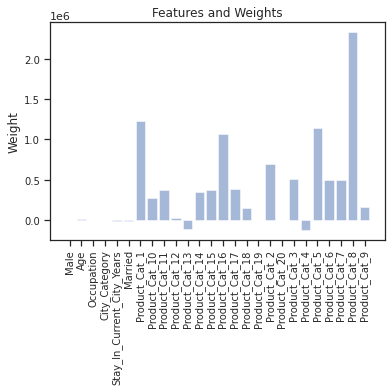

In [ ]:
weights = lmCV.coef_
features = list(X_train)
y_pos = np.arange(len(features))

plt.bar(y_pos, weights, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('Weight')
plt.title('Features and Weights')

plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.xticks(rotation=90)

plt.show()

Certain ordinal Product Categories seem to have a high weight and affect the OLS quite stronly

In [ ]:
error = Y_test_pred-Y_test.array

plt.plot(Y_test, Y_test_pred, 'r+')
plt.plot(Y_test, Y_test, 'b+')

plt.ticklabel_format(style='plain')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=90)

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.]),
 <a list of 10 Text major ticklabel objects>)

The plot shows, that the model performs better on purchases, that are not too high. <br>
The higher the purchase price per user is, the higher the deviation between actual and predicted purchase amount. <br>
This could be explained by the lower amout of data in those high-purchase-price-regions.

## 7.2 KNN

For KNN there are multiple parameters that can be analyzed. <br>
- **n-neighbors (default: 5)** <br>
We already learned from our rough testing that in a range between 3 and 22 neighbors, trying every second number, the optimal amount of neighbors seems to be close to 5. <br>
With 3 and 7 already tested in the rough testing above, the remaining interesting tests are 4, 5 and 6 neighbors. <br>
Looking at the results of the testing it can be said, that 4 neighbors seems to be the optimal amount.
- **weights (default: uniform)** <br>
The weights parameter defines if the distance of the neighbors is relevant for their impact on the result (closer = more weight/impact). By defalt the parameter is set to 'uniform', allowing no weighting by distance. <br>
Based on our testing we can se a huge improvement to an outstanding result of the R2 and a small improvement of the pseudo-R2
- **algorithm (default: auto)** <br>
There are different algorithms that can be used to compute the nearest neigbors. <br>
With the default option set to auto, KNeighborsRegressor tries to automatically select the optimal one, but offering the model all options exept 'auto', the 'ball_tree' seems to produce the best results.
- **p (default: 2)** <br>
The 'p' parameter is used to define how the multidimesional space is build up and how the distances between two points is therefore calculated. <br>
The standard way of this model to calculate this is with the classical euclidian distance. The model is also able to use different methods, like for example the Manhatten Distance: <br>
Here the distance is calculated using only right angles - Just like the streets in the citydistrict of Manhatten. <br>
Testing all different options, the Manhattern Distance boosts the Pseudo-R2 4% over the result of the Euclidean Distance, which is the default for this parameter

<br><br>
There are multiple other parameters that are not relevant for this usecase:
- **leaf_size (default: 60)** Only relevant for speed, impacting needed memory<br>
- **n_jobs (default: None)** This parameter is only regulating the amount of used resources and has no effect on the fit.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

print(data_set)
knnmodelCV = KNeighborsRegressor()
print(knnmodelCV.get_params().keys())
param_grid = { 
    'n_neighbors': range(3, 6, 1),
    'weights': ['uniform', 'distance'],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'p' : [1, 2, 3, 4]
}
CV_knnmodel = GridSearchCV(estimator=knnmodelCV, param_grid=param_grid, cv=10)
CV_knnmodel.fit(X_train, Y_train)
print(CV_knnmodel.best_params_)
knnmodelCV = knnmodelCV.set_params(**CV_knnmodel.best_params_)
knnmodelCV.fit(X_train, Y_train)
Y_train_pred = knnmodelCV.predict(X_train)
Y_train_dev = sum((Y_train-Y_train_pred)**2)
r2 = 1 - Y_train_dev/Y_train_meandev
print("R2 =", r2)
Y_test_pred = knnmodelCV.predict(X_test)
Y_test_dev = sum((Y_test-Y_test_pred)**2)
pseudor2 = 1 - Y_test_dev/Y_test_meandev
print("Pseudo-R2 =", pseudor2)
report_final.loc[len(report_final)] = ['k-Nearest NeighborsCV', r2, pseudor2,
          CV_knnmodel.cv_results_['mean_test_score'][CV_knnmodel.best_index_],
          CV_knnmodel.cv_results_['std_test_score'][CV_knnmodel.best_index_]]
models_final.append(['knnmodelCV',knnmodelCV])  

3
dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
{'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
R2 = 1.0
Pseudo-R2 = 0.8938928779479517


Tre Result of the optimized KNN model is noticeable. <br>
With a perfect R2 and a good Pseudo-R2 this method is well suited for further usage.<br> 
The 0.107 lower score of the Pseudo-R2 can be a hint of slight overfitting. <br> 
Further Insights in the model and a comparison to other models will be made in the next chapter.

### 7.2.1 Insights



In [ ]:
error = Y_test_pred-Y_test.array

plt.plot(Y_test, Y_test_pred, 'r+')
plt.plot(Y_test, Y_test, 'b+')

plt.ticklabel_format(style='plain')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=90)


(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.]),
 <a list of 10 Text major ticklabel objects>)

Just like the OLS the plot shows, that the model performs better on purchases, that are not too high. <br>
The higher the purchase price per user is, the higher the deviation between actual and predicted purchase amount. <br>
Just like the OLS, this could be explained by the lower amout of data in those high-purchase-price-regions.

## 7.3 EBM

### 7.3.1 Model fine tuning

Index                     64
R2.Train             0.98237
R2.Test             0.967608
bin                 quantile
max_round               570
max_leaf                   4
min_samples_leaf           2
Name: 64, dtype: object

In [ ]:
report_hyper_parameters = pd.DataFrame(columns=['Index', 'Split no.','R2.Train','R2.Test','bin','max_round', 'max_leaf','min_samples_leaf'])
X_train, X_test, Y_train, Y_test = train_test_split(data_3_x, data_3_y, test_size = 1 - training_set_percentage, random_state= 1)

#hyper
binning = ['quantile']
max_rounds = [570]
max_leaves = [4]
min_samples_leaves = [2,3]

index = 0
for bin in binning:
  for max_round in max_rounds:
    for max_leaf in max_leaves:
      for min_samples_leaf in min_samples_leaves:
      
        for cv in range(1,11):
          split_no = cv

          
          X_train_s, X_validate, Y_train_s, Y_validate = train_test_split(X_train, Y_train, test_size = 0.2, random_state= cv)


          Y_train_s_mean = Y_validate.mean()
          Y_train_s_meandev = sum((Y_train_s-Y_train_s_mean)**2)
          Y_validate_meandev = sum((Y_validate-Y_train_s_mean)**2)


          ebm = ExplainableBoostingRegressor(binning= bin, max_rounds= max_round, max_leaves= max_leaf, min_samples_leaf= min_samples_leaf)
          ebm.fit(X_train_s, Y_train_s)
          Y_train_s_pred = ebm.predict(X_train_s)
          Y_train_s_dev = sum((Y_train_s-Y_train_s_pred)**2)
          r2 = 1 - Y_train_s_dev/Y_train_s_meandev
          Y_validate_pred = ebm.predict(X_validate)
          Y_validate_dev = sum((Y_validate-Y_validate_pred)**2)
          pseudor2 = 1 - Y_validate_dev/Y_validate_meandev
          report_hyper_parameters.loc[len(report_hyper_parameters)] = [index, split_no, r2, pseudor2,
                                                                        bin,
        
                                                                        max_round, max_leaf, min_samples_leaf]
        
        index += 1

#winning model
ebm = ExplainableBoostingRegressor(binning= report_hyper_parameters.loc[report_hyper_parameters['R2.Test'].idxmax()]['bin'], max_rounds= report_hyper_parameters.loc[report_hyper_parameters['R2.Test'].idxmax()]['max_round'], max_leaves= report_hyper_parameters.loc[report_hyper_parameters['R2.Test'].idxmax()]['max_leaf'], min_samples_leaf= report_hyper_parameters.loc[report_hyper_parameters['R2.Test'].idxmax()]['min_samples_leaf'])
ebm.fit(X_train, Y_train)
Y_train_pred = ebm.predict(X_train)
Y_train_dev = sum((Y_train-Y_train_pred)**2)
r2 = 1 - Y_train_dev/Y_train_meandev
print("R2 =", r2)
Y_test_pred = ebm.predict(X_test)
Y_test_dev = sum((Y_test-Y_test_pred)**2)
pseudor2 = 1 - Y_test_dev/Y_test_meandev
print("Pseudo-R2 =", pseudor2)


report_final.loc[len(report_final)] = ['EBM', r2, pseudor2,
          report_hyper_parameters.where(report_hyper_parameters['Index'] == report_hyper_parameters.loc[report_hyper_parameters['R2.Test'].idxmax()]['Index'])['R2.Test'].mean(),
          report_hyper_parameters.where(report_hyper_parameters['Index'] == report_hyper_parameters.loc[report_hyper_parameters['R2.Test'].idxmax()]['Index'])['R2.Test'].std()]


models_final.append(['EBM',ebm])               

R2 = 0.9843328090127271
Pseudo-R2 = 0.9710719520486034


### 7.3.2 Insights 

In [ ]:
ebm_global = ebm.explain_global()
show(ebm_global)

/usr/local/lib/python3.7/dist-packages/interpret/provider/visualize.py:44: UserWarning: Cloud environment detected (['colab', 'ipython']): viz integration is still experimental.
  detected_envs


#8 Findings and Interpretation

Our final report:

In [ ]:
print(report_final)

                   Model  R2.Train   R2.Test  R2_Mean_CV  R2_Std_CV
0       OLS RegressionCV  0.975062  0.973246    0.974247   0.003574
1  k-Nearest NeighborsCV  1.000000  0.893893    0.895426   0.011273
2                    EBM  0.984333  0.971072    0.963762   0.002905


TBA<br>

Loop winning models to get insights...

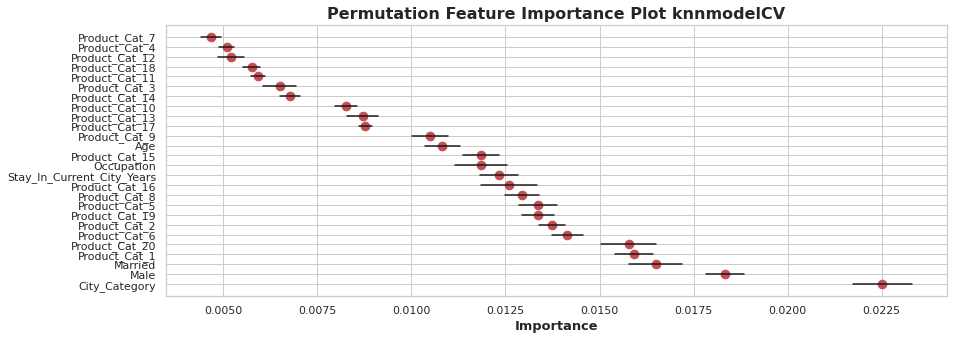

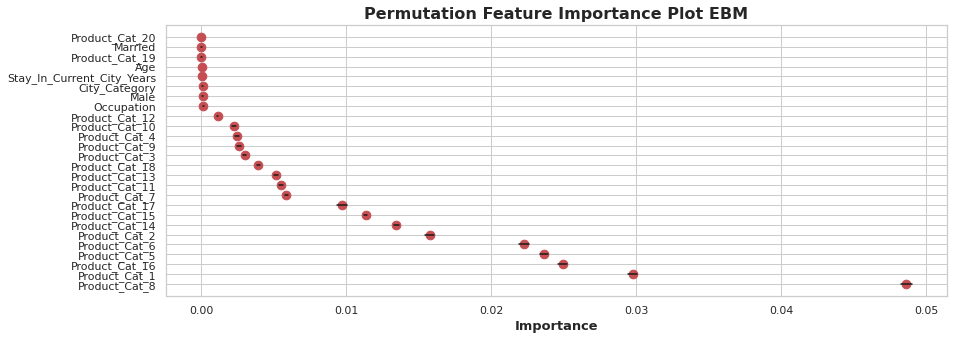

In [ ]:

for model in models_final:

  from sklearn.inspection import permutation_importance

  r = permutation_importance(model[1], X_train, Y_train,
                            random_state=7)
  features_names = []
  importance = []
  lower, upper = [], []

  for i in r.importances_mean.argsort()[::-1]:
      features_names.append(X_test.columns[i])
      importance.append(r.importances_mean[i])
      lower.append(r.importances_mean[i] - r.importances_std[i]) 
      upper.append(r.importances_mean[i] + r.importances_std[i]) 

  with sns.axes_style("whitegrid"):
      yaxis = range(len(importance))

      plt.figure(figsize = (14,5))
      plt.scatter(importance, yaxis, color = 'r', s=75)

      plt.plot((lower, upper), (yaxis, yaxis), 'k-')
          
      plt.yticks([i for i, _ in enumerate(features_names)], features_names)
      
      plt.xlabel('Importance', weight ='bold', size = 13)
      plt.title('Permutation Feature Importance Plot '+model[0], weight = 'bold', size = 16)

      plt.show()

Comparing the different feature importance of each model, some interesting comparisons can be made. <br> <br>
1. Product category 8 seems to be of high importance for the OLS regression and EBM. Especially for the EBM and OLS model the distance to the second most feature is noticable. Category 8 has medium importance to the KNN model.
<br>
2. The range of importance for all features is nicely low for the OLS and EBM model. With the KNN a bigger spread of importance can be observed. 
<br>
3. While the OLS model assigns high importance to only a few features, KNN and EBM distribute the importance more broadly between all features and dont assign a single high importance to one feature (excerption: Product_Cat_8 for EBM). This could result in higher roboustness of those two models, but testing with further data is necessary to test this thesis.
<br>

## 8.1 What gender shops more on Black Friday?

In [ ]:
sns.histplot(
    data_ori.groupby('User_ID').first().Gender,
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

n_bins = 20

# Generate two normal distributions
dist1 = female_data['Purchase']
dist2 = male_data['Purchase']

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1)
axs[1].hist(dist2)
print("Female mean: " + str(female_data['Purchase'].mean()))
print("Male mean:   " + str(male_data['Purchase'].mean()))

NameError: ignored

Not only more men shop on Black Fridays, but also their spendings per person is higher than females. <br>
Therefore it can be beneficial for the selling company to target men with their advertisements.

## 8.2 Do the occupations of the people have any impact on sales?

From the plot in section 2.11 (Purchase-Occupation) we can see, that there are differences in the the purchasevolume and distribution between the different Occupations. The graphic in 2.11 shows a "U" curve, with Occupation 1 having the highest "large-spenders". <br>
Looking at the three different models and their detailled analysis, you can see in first plot in section 8, that the Occupation has almost no relevance to to the models. The KNN model on the other hand assigns a medium importance to this feature. <br>
Based on this it can be said that some extreme "large-spenders" can be identified by their affiliation to a certain group, but there is no abstractable relation between the feature of occupation and the purchase amount.

## 8.3 Which age group is the highest spender?

In [ ]:
agespending = data_ori[['User_ID', 'Purchase', 'Age']]
agespending['Age'] = agespending['Age'].replace({'0-17':  1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7})
agespending = agespending.groupby(['User_ID']).agg({'Purchase':'sum', 'Age':'mean'})

sns.kdeplot(data=agespending, x="Age", y="Purchase")

This desity graph is displaying the amount of money purchased per customer group. <br>
It is clearly visible, that the highest spenders are in the age group between 26 and 35 (Group "3"). The purchased amount is falling in both directions starting from this age group quite constantly. <br>
Marketing departements of the Shops should therefore try to focus on customers in this age Group.

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc


Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!jupyter nbconvert --to PDF "Analytics and Big Data.ipynb"